### 姚泽洲  3220231262

### 数据分析要求
#### 3.1 数据摘要和可视化
**数据摘要**

 标称属性，给出每个可能取值的频数  
 
 数值属性，给出5数概括及缺失值的个数

**数据可视化**

 使用直方图、盒图等检查数据分布及离群点

#### 3.2 数据缺失的处理
观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:

将缺失部分剔除

用最高频率值来填补缺失值

通过属性的相关关系来填补缺失值

通过数据对象之间的相似性来填补缺失值

注意：在处理后完成，要对比新旧数据集的差异。

### 提交内容
分析过程报告（PDF格式）
程序所在代码仓库地址（使用Github或码云），仓库中应包含完整的处理数据的代码和使用说明
所选择的数据集在仓库的README文件中说明
相关的数据文件不要上传到代码仓库中
建议：使用Jupyter Notebook将分析报告和代码组织在一起，使用Notebook的导出功能将报告导出为PDF格式的文件上传到乐学。

In [92]:
import numpy as np
import pandas as pd 

movies_data = pd.read_csv('dataset/movies_dataset.csv') #加载数据集

movies_data.columns #查看列标签

Index(['Unnamed: 0', 'IMDb-rating', 'appropriate_for', 'director', 'downloads',
       'id', 'industry', 'language', 'posted_date', 'release_date', 'run_time',
       'storyline', 'title', 'views', 'writer'],
      dtype='object')

预处理的数据集来自 [Movies Dataset from Pirated Sites](https://www.kaggle.com/datasets/arsalanrehman/movies-dataset-from-piracy-website)

### 数据摘要

**标称属性** 给出每个可能取值的频数  
 
**数值属性** 给出5数概括及缺失值的个数

In [75]:
movies_data.info() #查看数据信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20548 entries, 0 to 20547
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       20548 non-null  int64  
 1   IMDb-rating      19707 non-null  float64
 2   appropriate_for  11072 non-null  object 
 3   director         18610 non-null  object 
 4   downloads        20547 non-null  object 
 5   id               20548 non-null  int64  
 6   industry         20547 non-null  object 
 7   language         20006 non-null  object 
 8   posted_date      20547 non-null  object 
 9   release_date     20547 non-null  object 
 10  run_time         18780 non-null  object 
 11  storyline        18847 non-null  object 
 12  title            20547 non-null  object 
 13  views            20547 non-null  object 
 14  writer           18356 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 2.4+ MB


In [76]:
movies_data.head(3) #展示前三行示例

,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,0,4.8,R,John Swab,304,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,"2,794",John Swab
1,1,6.4,TV-PG,Paul Ziller,73,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,"1,002",John Christian Plummer
2,2,5.2,R,Ben Wheatley,"1,427",343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,"14,419",Ben Wheatley


#### 标称属性

id: movie's unique id，电影的唯一ID

title: movie's name，电影名称

storyline: a short description of the movie，电影简短描述

appropriate_for: R-rated, PG-13, etc，适宜观看程度，限制级，13岁以上观看等等

language: this can be multiple languages also，语言

industry: Hollywood, Bollywood, etc，所属地区，好莱坞，宝莱坞等等

posted_date: when the movie is posted on the platform，发布时间

release_date: when the movie is released worldwide，上映时间

director: director's name，导演

writer: list of all the writers，作者

In [77]:
movies_data['id'].value_counts() #获取id每个可能取值的频数

372090    402
371744    402
371877    402
372092    202
371991    202
         ... 
303381      1
303380      1
303379      1
303377      1
30459       1
Name: id, Length: 17086, dtype: int64

In [78]:
movies_data['title'].value_counts() #获取title每个可能取值的频数

The Girl Who Escaped: The Kara Robinson Story    402
Vaathi                                           402
Who Invited Charlie?                             402
Little Dixie                                     202
The Inspection                                   202
                                                ... 
Kesari                                             1
Old Boys                                           1
American Exit                                      1
Adventures of Aladdin                              1
Madhumati                                          1
Name: title, Length: 16572, dtype: int64

In [79]:
movies_data['storyline'].value_counts() #获取storyline每个可能取值的频数

The life of a young man and his struggles against the privatization of education.                                                                                                                                                                                                                                                                                                                                                                                                    402
Follows\r\n a New York City family hiding out in the Hamptons whose bubble is \r\npopped when a Bloody Mary-swilling, pot-smoking 'Charlie' comes to bring\r\n a lifetime of hurt that might heal them all.                                                                                                                                                                                                                                                                          402
It follows Kara Robinson as she survives an abduction 

In [80]:
movies_data['appropriate_for'].value_counts() #获取appropriate_for每个可能取值的频数

R                 4384
Not Rated         2142
PG-13             1968
PG                 886
TV-14              694
TV-MA              406
G                  152
Unrated            132
TV-PG              115
TV-G                99
TV-Y7               45
TV-Y                25
Approved             9
NC-17                4
TV-Y7-FV             3
Passed               3
MA-17                1
TV-13                1
Drama                1
Drama, Romance       1
18+                  1
Name: appropriate_for, dtype: int64

In [81]:
movies_data['language'].value_counts() #获取language每个可能取值的频数

English                                 12657
Hindi                                    2558
English,Spanish                           391
Punjabi                                   310
English,Hindi                             304
                                        ...  
English,Korean,Spanish                      1
Norwegian,Swedish                           1
Spanish,Chinese,English,Maori,French        1
Urdu,Punjabi,English                        1
Spanish,German,English                      1
Name: language, Length: 1168, dtype: int64

In [82]:
movies_data['industry'].value_counts() #获取industry每个可能取值的频数

Hollywood / English    14649
Bollywood / Indian      2645
Tollywood               1172
Anime / Kids            1049
Wrestling                433
Punjabi                  332
Stage shows              129
Pakistani                 92
Dub / Dual Audio          45
3D Movies                  1
Name: industry, dtype: int64

In [83]:
movies_data['posted_date'].value_counts() #获取posted_date每个可能取值的频数

13 Feb, 2023    812
20 Feb, 2023    607
15 Feb, 2023    607
10 Feb, 2023    485
16 Feb, 2023    406
               ... 
12 Sep, 2009      1
08 Sep, 2009      1
01 Sep, 2009      1
18 Aug, 2009      1
30 Nov, 2011      1
Name: posted_date, Length: 4123, dtype: int64

In [84]:
movies_data['release_date'].value_counts() #获取release_date每个可能取值的频数

Jan 01 1970    962
Feb 03 2023    616
Feb 17 2023    607
Feb 10 2023    410
Feb 11 2023    402
              ... 
Sep 05 2003      1
Dec 29 2022      1
Aug 24 2013      1
Jan 12 2014      1
Mar 28 1958      1
Name: release_date, Length: 4886, dtype: int64

In [85]:
movies_data['director'].value_counts() #获取director每个可能取值的频数

Venky Atluri                                  405
Simone Stock                                  403
Xavier Manrique                               403
John Swab                                     205
Neil Jordan                                   205
                                             ... 
Agnieszka Smoczynska                            1
Dylan Thomas Ellis                              1
Sunil Thakur, Sunil Dhawan, Shivani Thakur      1
Suman Mukhopadhyay                              1
Shea Sizemore                                   1
Name: director, Length: 9672, dtype: int64

In [86]:
movies_data['writer'].value_counts() #获取writer每个可能取值的频数

Nicholas Schutt                           403
Venky Atluri                              402
Haley Harris                              402
John Swab                                 205
Elegance Bratton                          202
                                         ... 
Barbara Samuels, Joseph Boyden              1
Maria Allred                                1
Pia Mechler                                 1
Paul Flannery, David Ryan Keith             1
Khwaja Ahmad Abbas, Khwaja Ahmad Abbas      1
Name: writer, Length: 13603, dtype: int64

观察可以发现数据集中存在大量的重复数据（存在一些电影唯一id出现了多次），这里先去除完全重复的数据行。

In [87]:
movies_data = movies_data.drop_duplicates()     #去除完全重复行

In [88]:
movies_data['id'].value_counts() #获取id每个可能取值的频数

372090    402
371744    402
371877    402
372092    202
371991    202
         ... 
303381      1
303380      1
303379      1
303377      1
30459       1
Name: id, Length: 17086, dtype: int64

In [89]:
movies_data['title'].value_counts() #获取title每个可能取值的频数

The Girl Who Escaped: The Kara Robinson Story    402
Vaathi                                           402
Who Invited Charlie?                             402
Little Dixie                                     202
The Inspection                                   202
                                                ... 
Kesari                                             1
Old Boys                                           1
American Exit                                      1
Adventures of Aladdin                              1
Madhumati                                          1
Name: title, Length: 16572, dtype: int64

观察可以发现去除完全重复行之后标称属性可能取值的频数并无变化，表示数据中存在id相同但是views等属性不同的数据行。

#### 数值属性

views: no. of clicks per movie，点击次数

downloads: no. of downloads per movie，下载次数

IMDb-rating: rating，评分

runtime: in minutes，运行时间

In [93]:
movies_data['views'] = movies_data['views'].apply(lambda x: str(x))
movies_data['views'] = movies_data['views'].str.replace(',', '').astype(float)
movies_data['views'].describe() #获取downloads的分布，包括计数，均值，标准差，最小值，25%，50%，75%，最大值

count    2.054700e+04
mean     3.559551e+04
std      6.247242e+04
min      6.670000e+02
25%      7.571500e+03
50%      1.522200e+04
75%      3.657100e+04
max      1.638533e+06
Name: views, dtype: float64

In [94]:
movies_data['downloads'] = movies_data['downloads'].apply(lambda x: str(x))
movies_data['downloads'] = movies_data['downloads'].str.replace(',', '').astype(float)
movies_data['downloads'].describe() #获取downloads的分布，包括计数，均值，标准差，最小值，25%，50%，75%，最大值

count     20547.000000
mean      10795.238916
std       23716.181987
min           0.000000
25%         855.500000
50%        2716.000000
75%       10070.000000
max      391272.000000
Name: downloads, dtype: float64

In [95]:
movies_data['IMDb-rating'].describe() #获取IMDb-rating的分布，包括计数，均值，标准差，最小值，25%，50%，75%，最大值

count    19707.000000
mean         5.762151
std          1.374041
min          1.100000
25%          4.800000
50%          5.700000
75%          6.600000
max          9.900000
Name: IMDb-rating, dtype: float64

In [96]:
def convert_to_minutes(duration):
    # 如果输入是字符串，并且包含'h'和'min'，则表示时间以小时和分钟为单位
    if isinstance(duration, str) and ('h' in duration or 'm' in duration):
        # 去除字符串中的'h'和'min'，并尝试将其转换为整数
        duration = duration.replace('h', '').replace('m', '')
        # 如果输入包含'h'，则表示时间以小时为单位
        if 'h' in duration:
            hours, minutes = duration.split('h')
            return int(hours) * 60 + int(minutes)
        # 如果输入包含'min'，则表示时间以分钟为单位
        elif 'min' in duration:
            return int(duration)
    # 如果输入不是字符串，直接返回原始值
    else:
        return duration

# 使用 apply() 方法将自定义时间转换为分钟数函数应用到run_time列上
movies_data['run_time'] = movies_data['run_time'].apply(convert_to_minutes)

movies_data['run_time'] = pd.to_numeric(movies_data['run_time'], errors='coerce')
movies_data['run_time'].describe()  #获取run_time的分布，包括计数，均值，标准差，最小值，25%，50%，75%，最大值

count    13334.000000
mean       109.813334
std         25.170127
min          2.000000
25%         92.000000
50%        103.000000
75%        126.000000
max        321.000000
Name: run_time, dtype: float64

In [97]:
views_description = movies_data['views'].describe()
downloads_description = movies_data['downloads'].describe()
IMDb_rating_description = movies_data['IMDb-rating'].describe()
run_time_description = movies_data['run_time'].describe()
# 将这三列的数值分布的统计信息进行合并
numeric_describe = pd.concat([views_description, downloads_description, IMDb_rating_description, run_time_description], axis=1)
numeric_describe

,views,downloads,IMDb-rating,run_time
count,2.054700e+04,20547.000000,19707.000000,13334.000000
mean,3.559551e+04,10795.238916,5.762151,109.813334
std,6.247242e+04,23716.181987,1.374041,25.170127
min,6.670000e+02,0.000000,1.100000,2.000000
25%,7.571500e+03,855.500000,4.800000,92.000000
50%,1.522200e+04,2716.000000,5.700000,103.000000
75%,3.657100e+04,10070.000000,6.600000,126.000000
max,1.638533e+06,391272.000000,9.900000,321.000000


In [98]:
numeric_describe.loc[['min', '25%', '50%', '75%', 'max']] #获取数值属性的五数概括

,views,downloads,IMDb-rating,run_time
min,667.0,0.0,1.1,2.0
25%,7571.5,855.5,4.8,92.0
50%,15222.0,2716.0,5.7,103.0
75%,36571.0,10070.0,6.6,126.0
max,1638533.0,391272.0,9.9,321.0


In [99]:
missing_counts = pd.DataFrame(movies_data.isnull().sum(), columns=['missing_counts']).T #获取缺失值数量
missing_counts

,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
missing_counts,0,841,9476,1938,1,0,1,542,1,1,7214,1701,1,1,2192


### 数据可视化

 使用直方图、盒图等检查数据分布及离群点

In [100]:
id_counts = pd.DataFrame(movies_data['id'].value_counts()).rename(columns={'id': 'id_count'})
id_counts

,id_count
372090,402
371744,402
371877,402
372092,202
371991,202
...,...
303381,1
303380,1
303379,1
303377,1


<BarContainer object of 17086 artists>

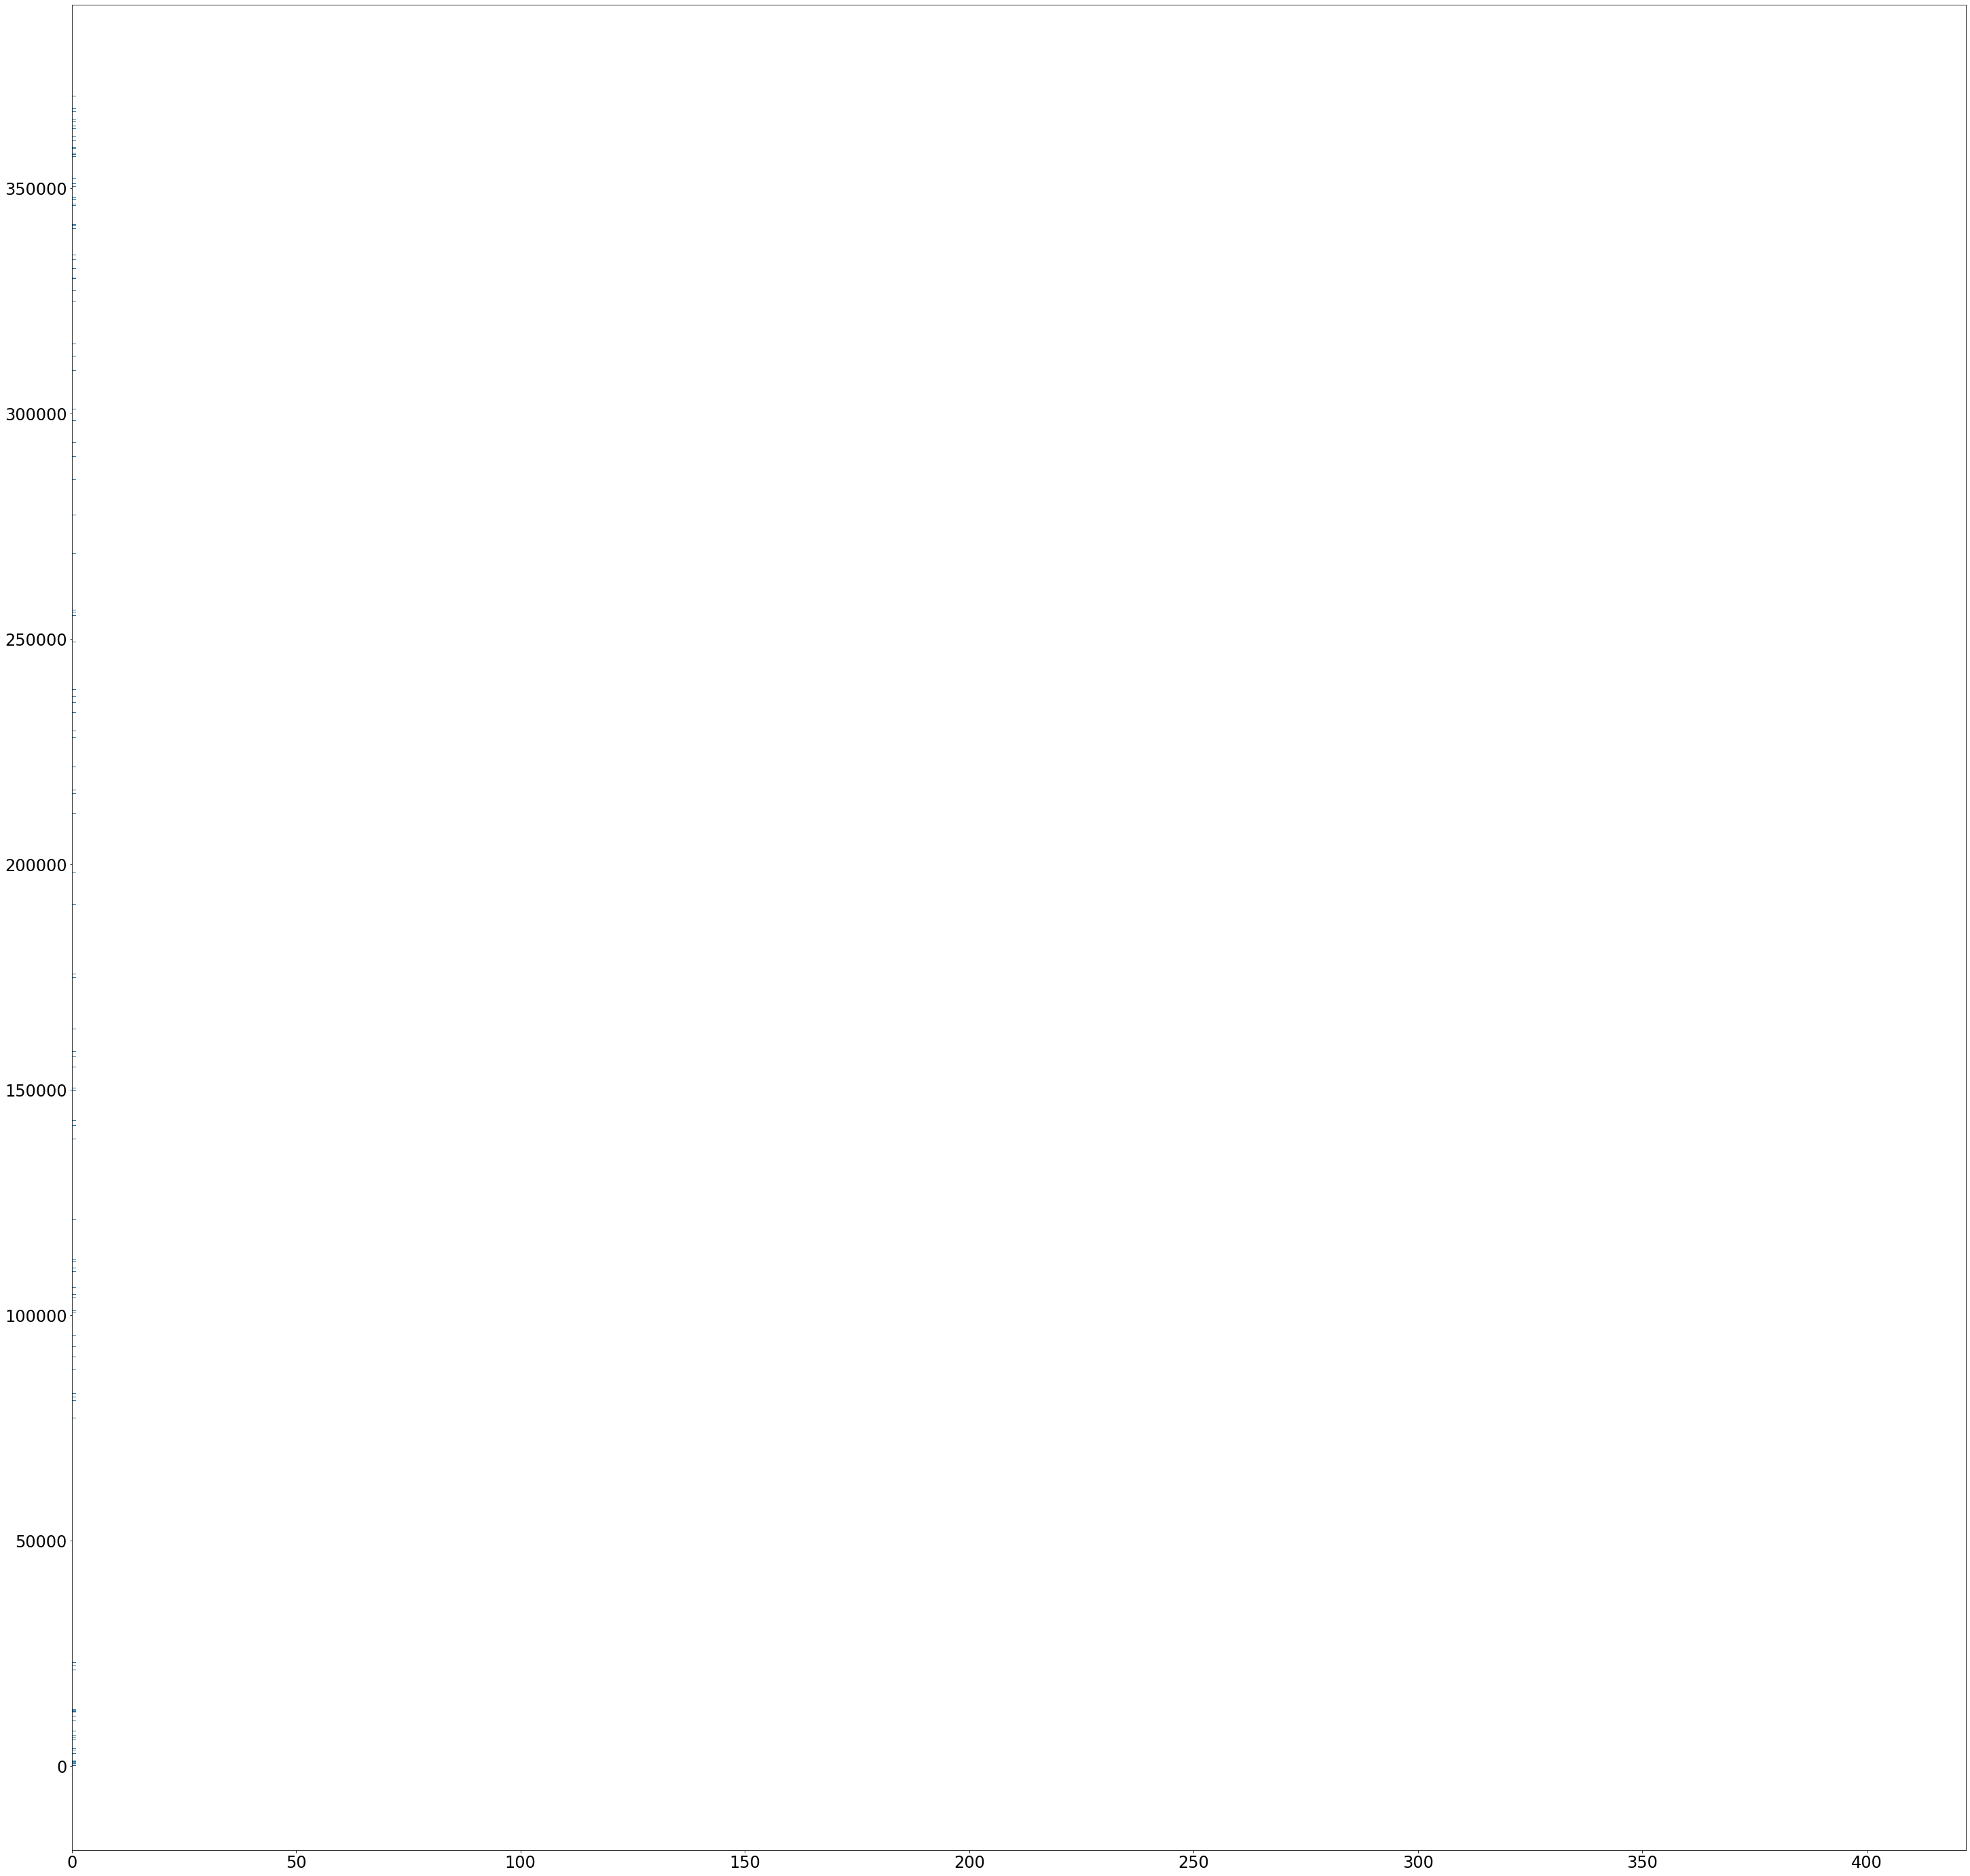

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 50))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(id_counts.index, width=id_counts['id_count'])  #id直方图

观察得到，由于数据id的数量过多，且绝大多数数值较小，以及最小值与最大值间差距较大，故直方图带来的直观视效并不明显，结合上述title、storyline、posted_date、release_date、director和writer的频数，可以预见这些属性的直方图与id的直方图类似，视效均不明显，在这里放弃对其直方图的绘制。

In [102]:
appropriate_for_counts = pd.DataFrame(movies_data['appropriate_for'].value_counts()).rename(columns={'appropriate_for': 'appropriate_for_count'})
appropriate_for_counts

,appropriate_for_count
R,4384
Not Rated,2142
PG-13,1968
PG,886
TV-14,694
TV-MA,406
G,152
Unrated,132
TV-PG,115
TV-G,99


<BarContainer object of 21 artists>

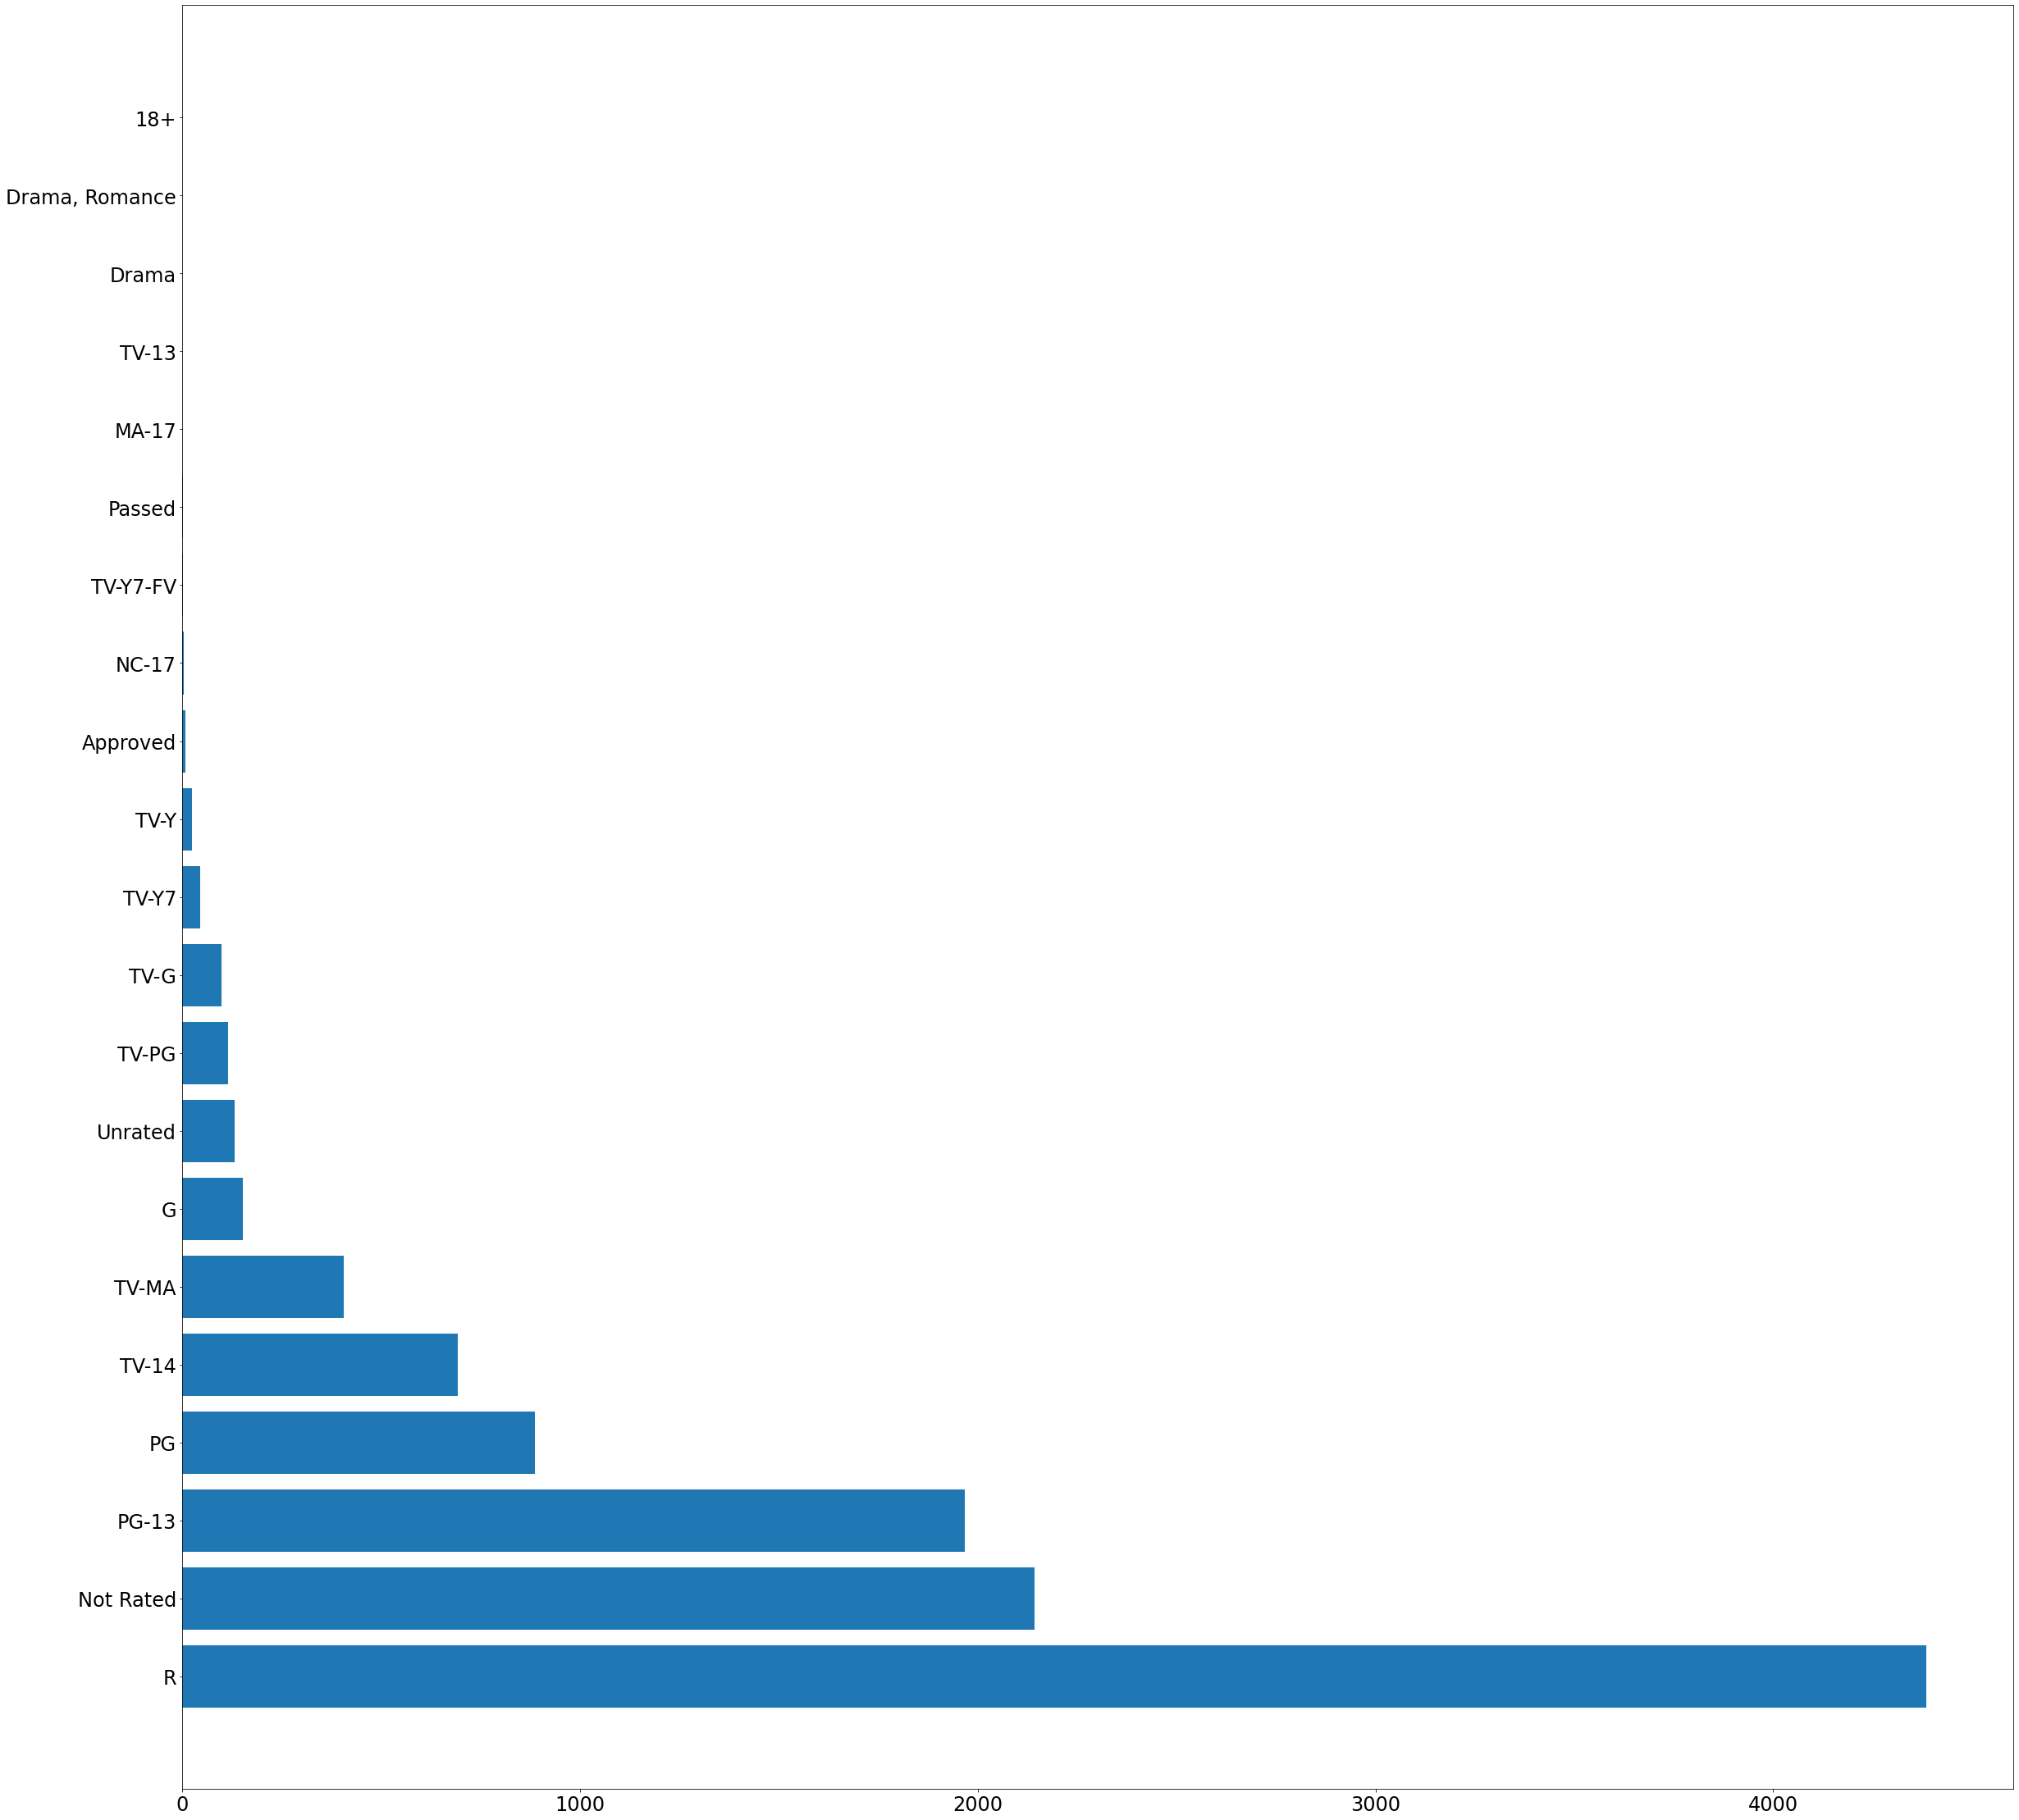

In [27]:
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(appropriate_for_counts.index, width=appropriate_for_counts['appropriate_for_count'])  #appropriate_for直方图

In [103]:
language_counts = pd.DataFrame(movies_data['language'].value_counts()).rename(columns={'language': 'language_count'})
language_counts

,language_count
English,12657
Hindi,2558
"English,Spanish",391
Punjabi,310
"English,Hindi",304
...,...
"English,Korean,Spanish",1
"Norwegian,Swedish",1
"Spanish,Chinese,English,Maori,French",1
"Urdu,Punjabi,English",1


<BarContainer object of 1168 artists>

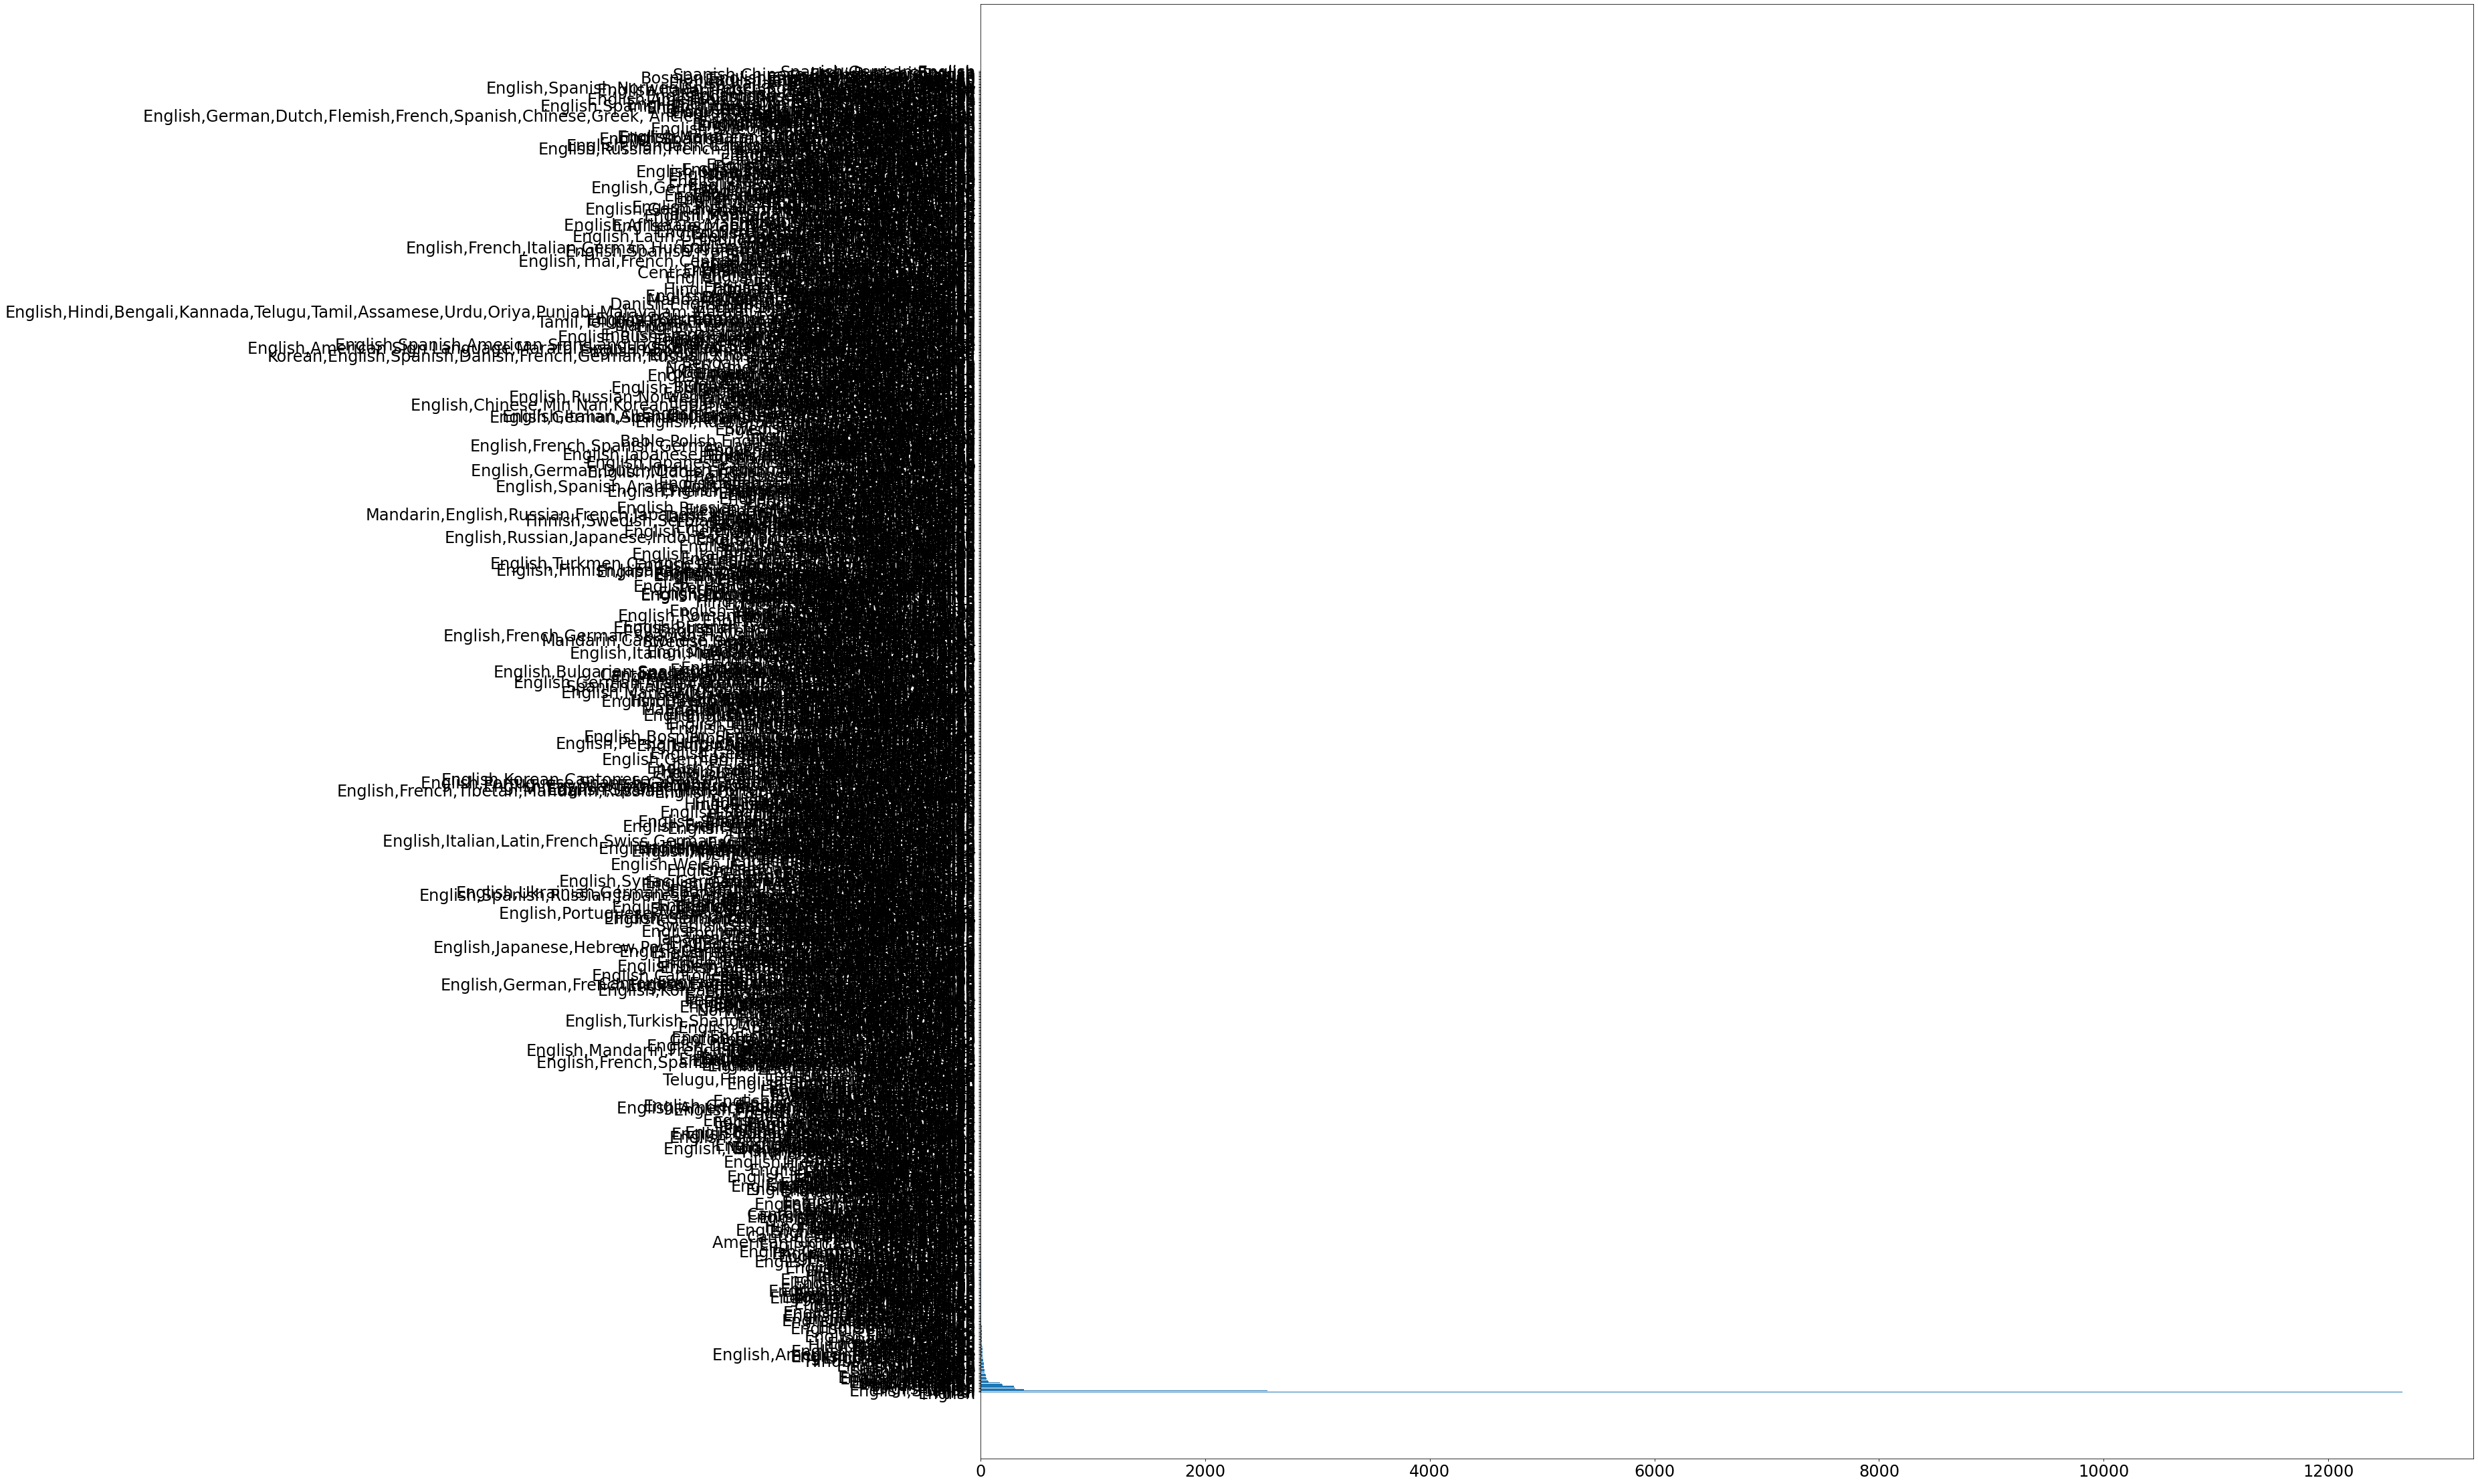

In [29]:
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(language_counts.index, width=language_counts['language_count'])  #language直方图

In [104]:
industry_counts = pd.DataFrame(movies_data['industry'].value_counts()).rename(columns={'industry': 'industry_count'})
industry_counts

,industry_count
Hollywood / English,14649
Bollywood / Indian,2645
Tollywood,1172
Anime / Kids,1049
Wrestling,433
Punjabi,332
Stage shows,129
Pakistani,92
Dub / Dual Audio,45
3D Movies,1


<BarContainer object of 10 artists>

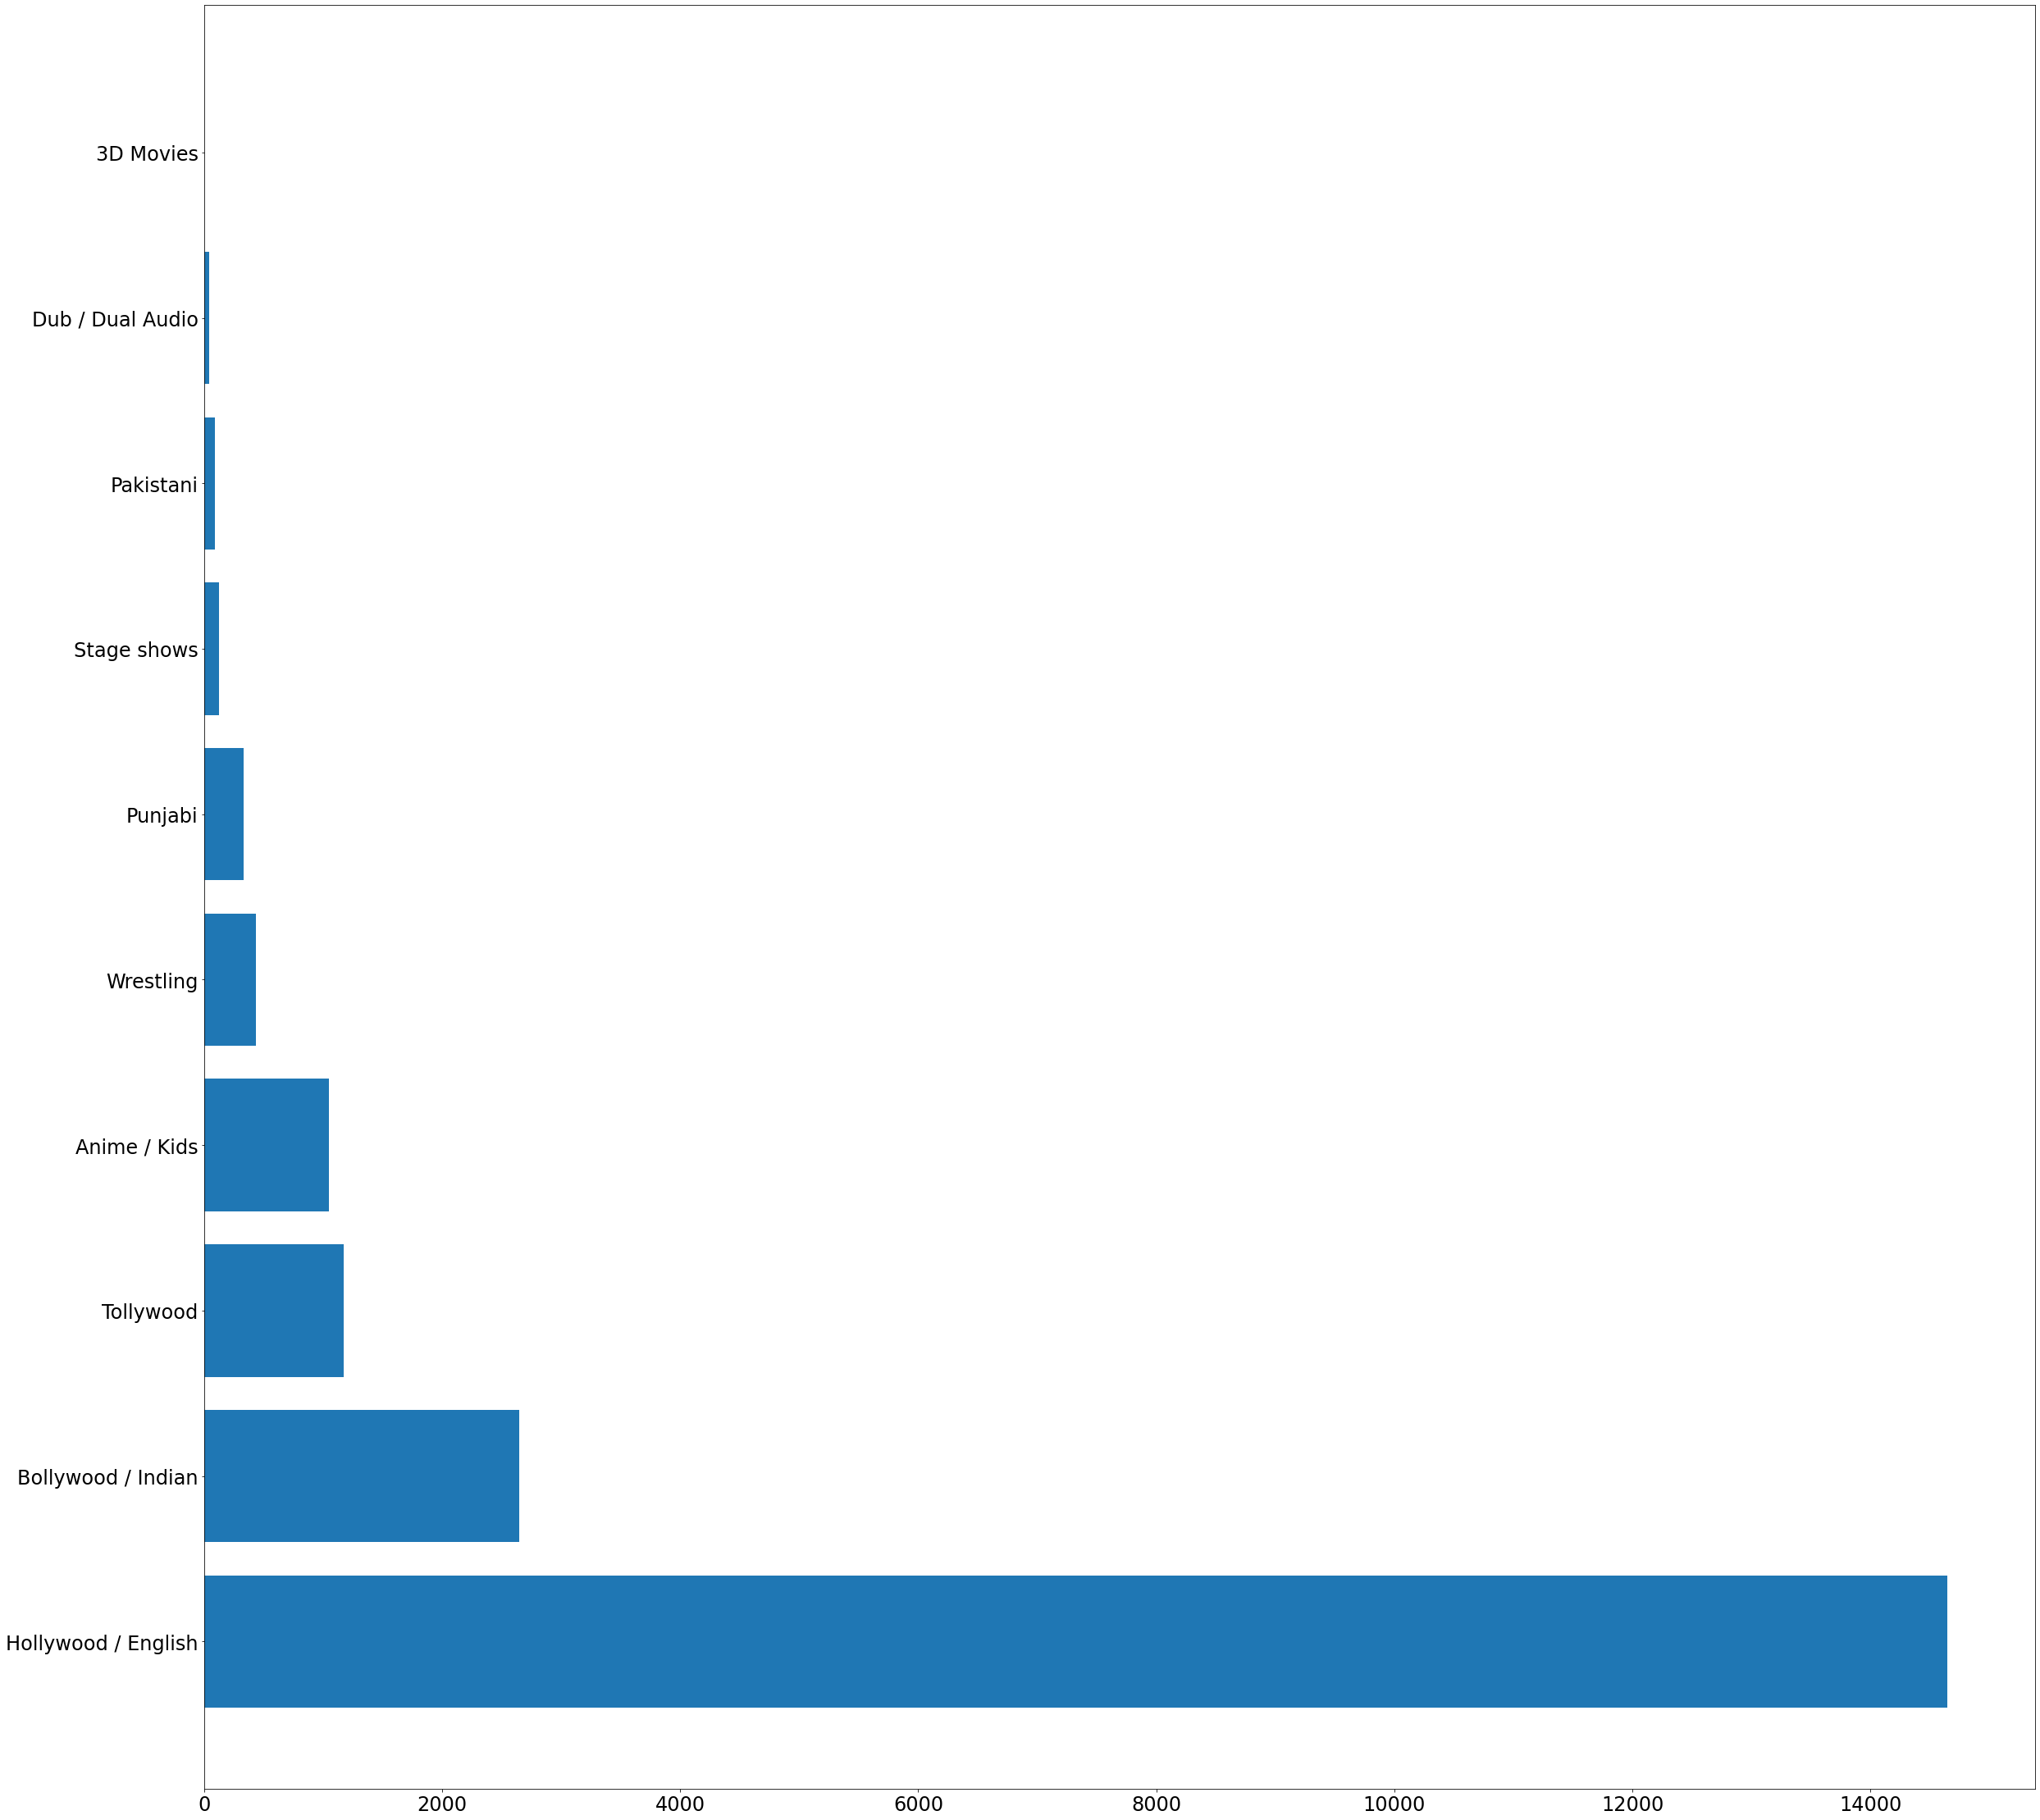

In [105]:
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(industry_counts.index, width=industry_counts['industry_count'])  #industry直方图

In [106]:
title_counts = pd.DataFrame(movies_data['title'].value_counts()).rename(columns={'title': 'title_count'})
title_counts

,title_count
The Girl Who Escaped: The Kara Robinson Story,402
Vaathi,402
Who Invited Charlie?,402
Little Dixie,202
The Inspection,202
...,...
Kesari,1
Old Boys,1
American Exit,1
Adventures of Aladdin,1


In [107]:
storyline_counts = pd.DataFrame(movies_data['storyline'].value_counts()).rename(columns={'storyline': 'storyline_count'})
storyline_counts

,storyline_count
The life of a young man and his struggles against the privatization of education.,402
"Follows\r\n a New York City family hiding out in the Hamptons whose bubble is \r\npopped when a Bloody Mary-swilling, pot-smoking 'Charlie' comes to bring\r\n a lifetime of hurt that might heal them all.",402
It follows Kara Robinson as she survives an abduction and ultimately brings down a serial killer.,402
"Doc\r\n facilitates a fragile truce between the Governor and Cartel, trading \r\nprosecutorial leniency for finance. With no more truce, Doc is left to \r\nfend for himself and protect the one untainted thing in his life: his \r\ndaughter, Little Dixie.",202
"A\r\n young, gay Black man, rejected by his mother and with few options for \r\nhis future, decides to join the Marines, doing whatever it takes to \r\nsucceed in a system that would cast him aside.",202
...,...
"Four waves of increasingly deadly attacks have left most of Earth in ruin. Against a backdrop of fear and distrust, Cassie is on the run, desperately trying to save her younger brother. As she prepares for the inevitable and lethal fifth wave, Cassie teams up with a young man who may become her final hope - if she can only trust him.",1
Yamuna along with her son Laxman locates to Mumbai leaving behind her abusive husband.She takes shelter in the house of her aunt Chandra whom she calls Akka.Yamuna's only aim is to give a better education to her son.Chandra finds her a job as sweeper in a art school.Yamuna finds that Chandra poses as a nude model to the students of the school.Chandra confines Yamuna to take up the job being nude out there the students don't look at you in lust but as a project.,1
"A young violinist struggles to assert her individuality amidst the intense pressure of her pianist father, and the weight of her own musical ability.",1
A right wing talk show host's life takes a sudden turn when his 16 year old niece comes crashing into his life.,1


In [34]:
posted_date_counts = pd.DataFrame(movies_data['posted_date'].value_counts()).rename(columns={'posted_date': 'posted_date_count'})
posted_date_counts

,posted_date_count
"13 Feb, 2023",812
"20 Feb, 2023",607
"15 Feb, 2023",607
"10 Feb, 2023",485
"16 Feb, 2023",406
...,...
"12 Sep, 2009",1
"08 Sep, 2009",1
"01 Sep, 2009",1
"18 Aug, 2009",1


In [35]:
release_date_counts = pd.DataFrame(movies_data['release_date'].value_counts()).rename(columns={'release_date': 'release_date_count'})
release_date_counts

,release_date_count
Jan 01 1970,962
Feb 03 2023,616
Feb 17 2023,607
Feb 10 2023,410
Feb 11 2023,402
...,...
Sep 05 2003,1
Dec 29 2022,1
Aug 24 2013,1
Jan 12 2014,1


In [36]:
director_counts = pd.DataFrame(movies_data['director'].value_counts()).rename(columns={'director': 'director_count'})
director_counts

,director_count
Venky Atluri,405
Simone Stock,403
Xavier Manrique,403
John Swab,205
Neil Jordan,205
...,...
Agnieszka Smoczynska,1
Dylan Thomas Ellis,1
"Sunil Thakur, Sunil Dhawan, Shivani Thakur",1
Suman Mukhopadhyay,1


In [37]:
writer_counts = pd.DataFrame(movies_data['writer'].value_counts()).rename(columns={'writer': 'writer_count'})
writer_counts

,writer_count
Nicholas Schutt,403
Venky Atluri,402
Haley Harris,402
John Swab,205
Elegance Bratton,202
...,...
"Barbara Samuels, Joseph Boyden",1
Maria Allred,1
Pia Mechler,1
"Paul Flannery, David Ryan Keith",1


In [108]:
movies_data['views'].value_counts()

6259.0      6
5926.0      5
5859.0      5
5603.0      5
4288.0      5
           ..
142470.0    1
104507.0    1
152768.0    1
6460.0      1
1419.0      1
Name: views, Length: 16821, dtype: int64

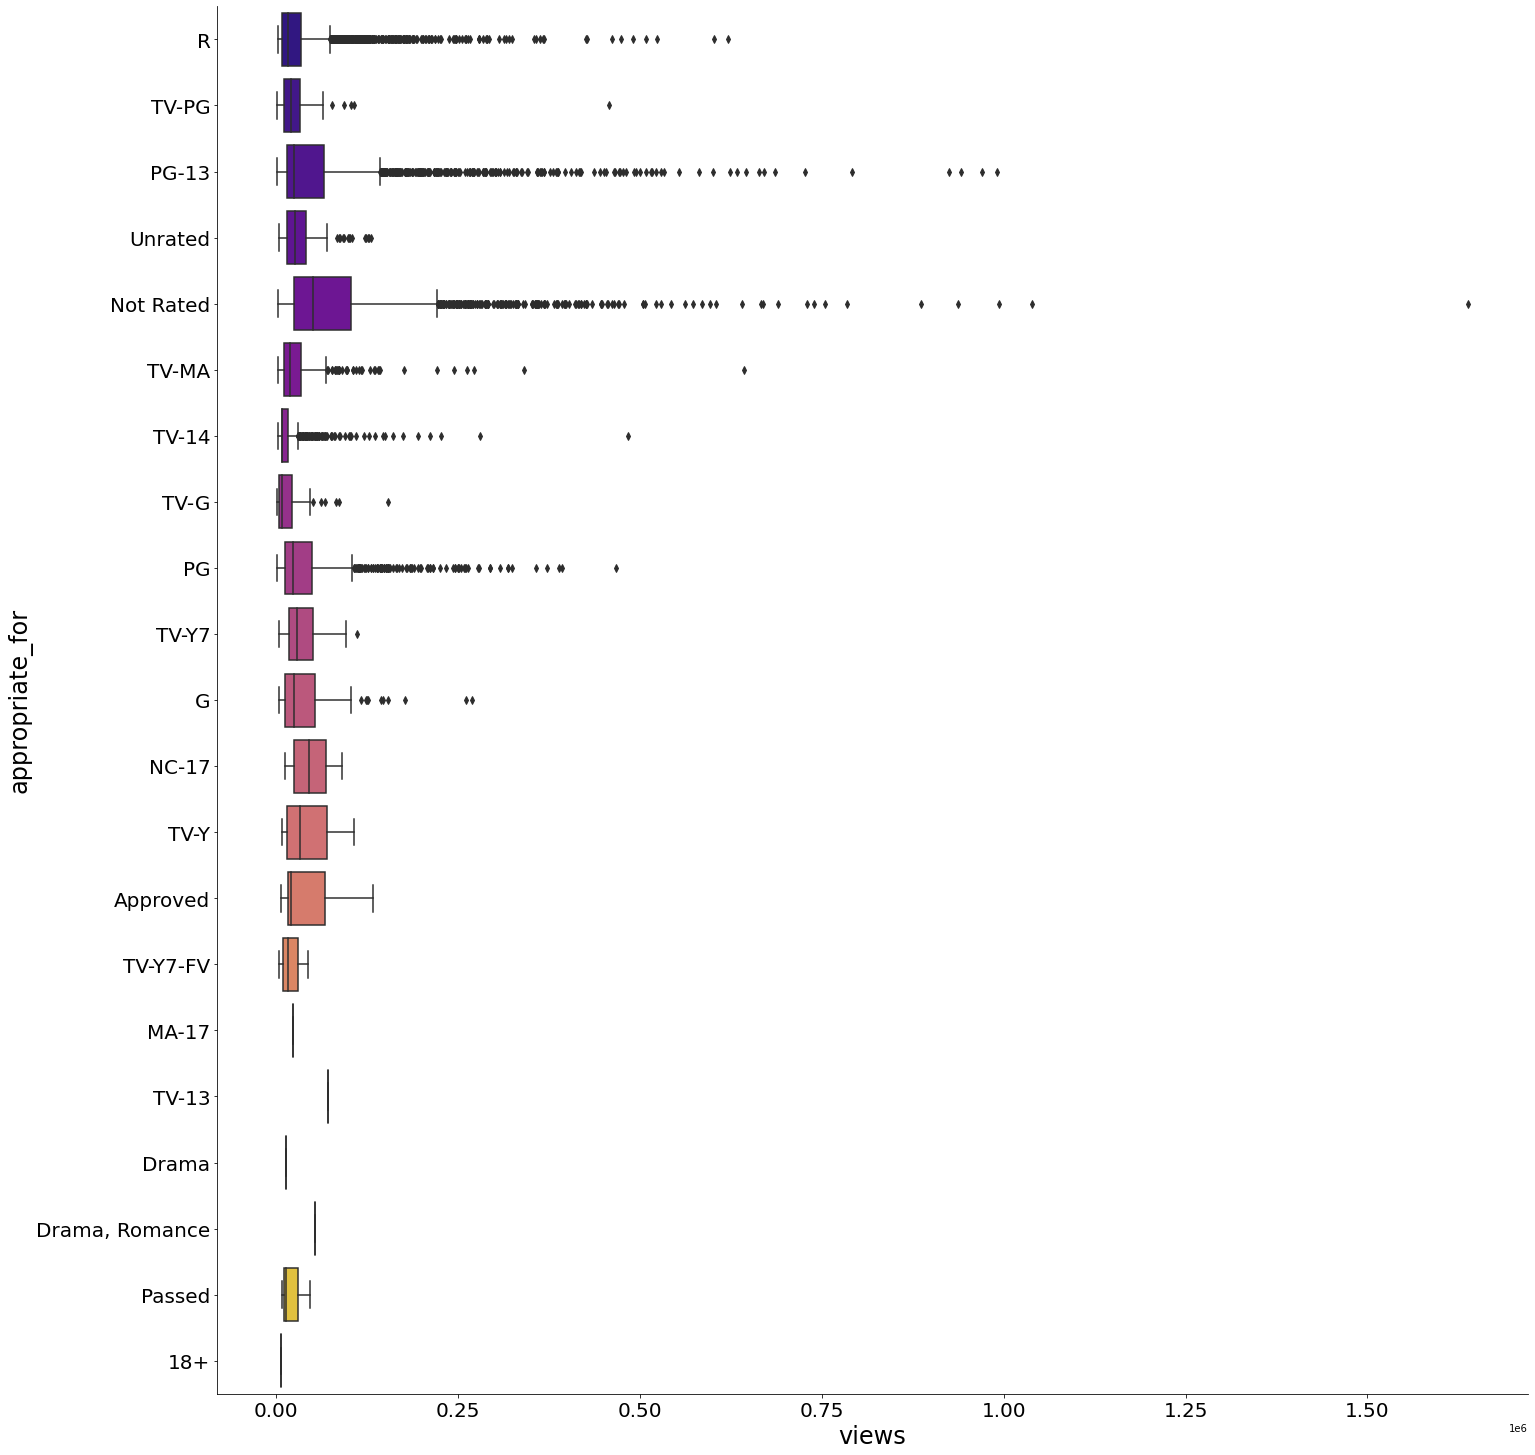

In [109]:
stars_count_box = sns.catplot(data=movies_data, kind='box', y='appropriate_for', x='views', height=20, palette='plasma', sym='*')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('appropriate_for', fontsize=24, )
plt.xlabel('views', fontsize=24)
plt.show()  #输出每一个appropriate_for对应的所有电影的views盒图并显示离群值

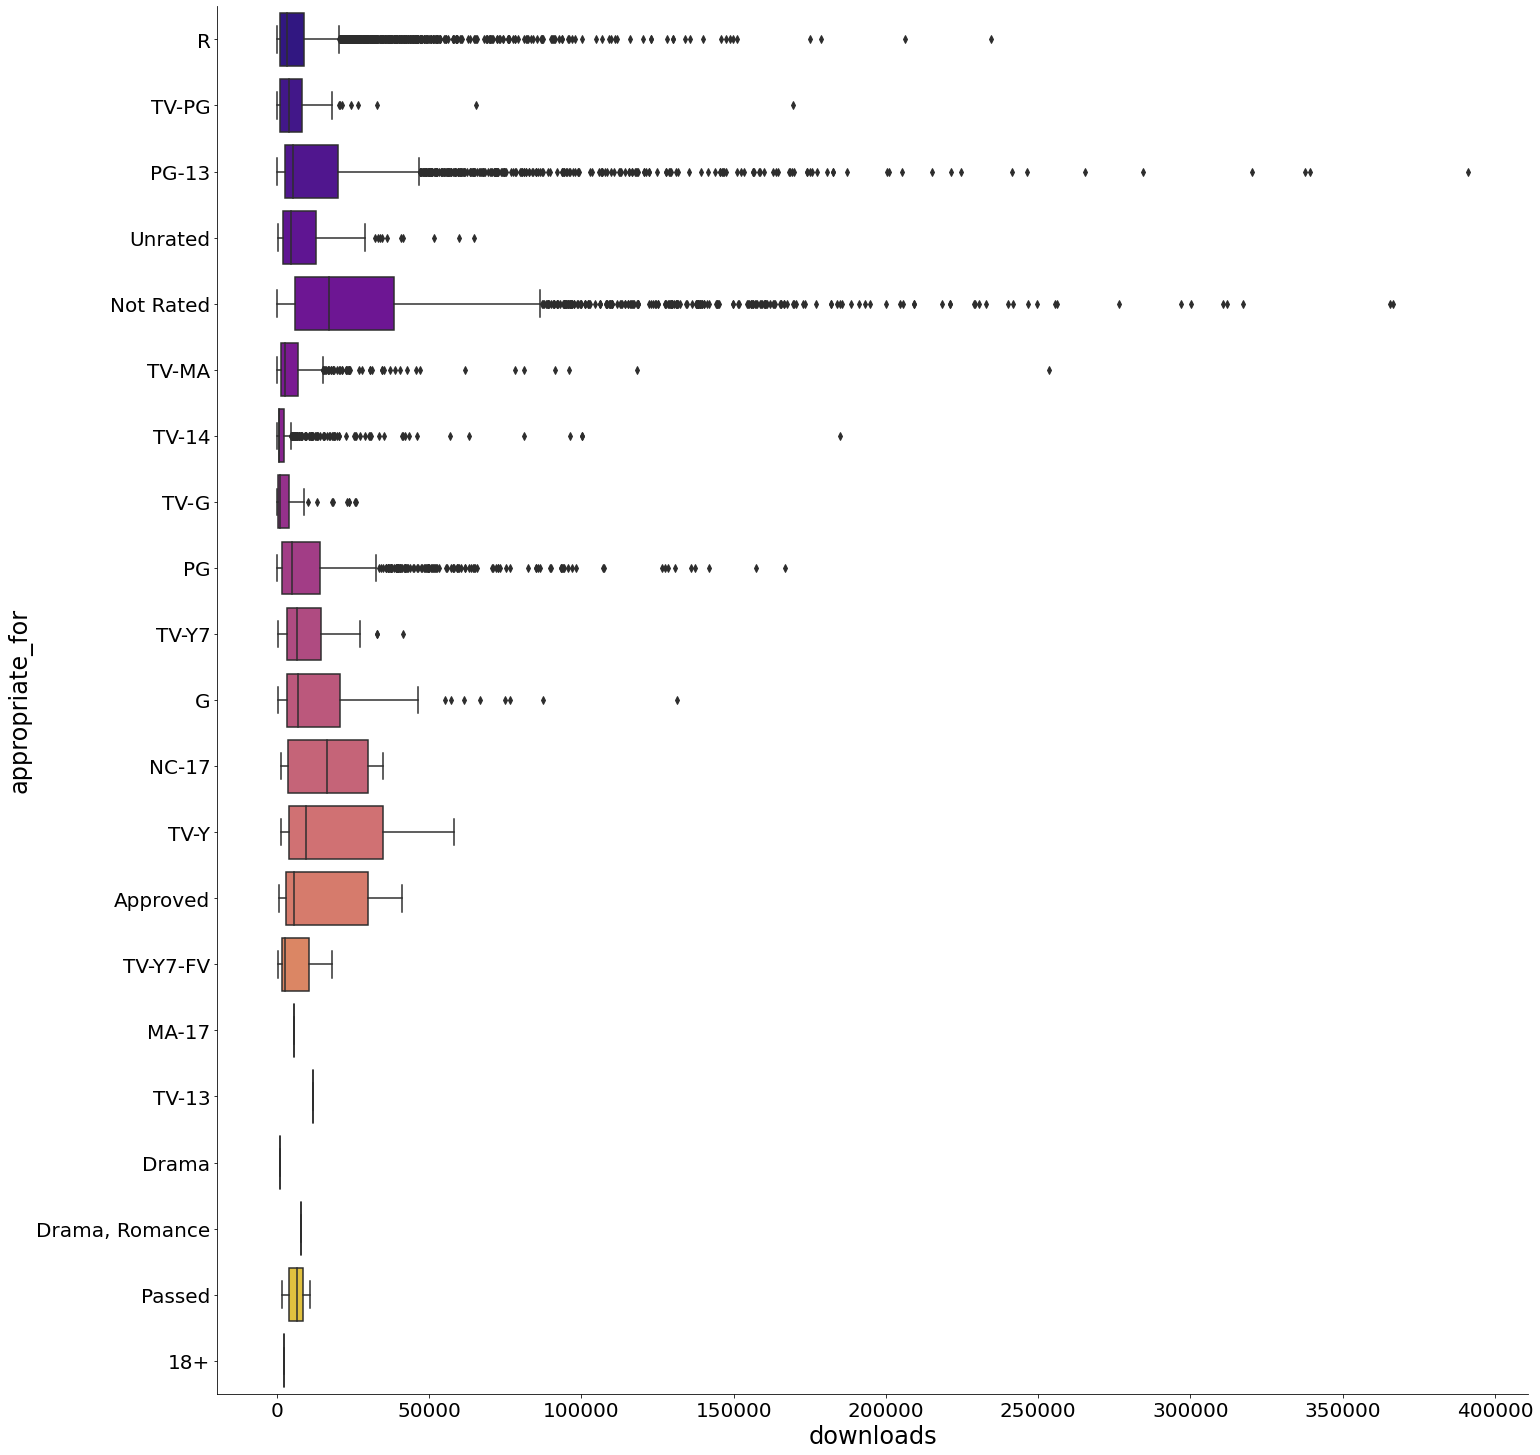

In [110]:
stars_count_box = sns.catplot(data=movies_data, kind='box', y='appropriate_for', x='downloads', height=20, palette='plasma', sym='*')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('appropriate_for', fontsize=24, )
plt.xlabel('downloads', fontsize=24)
plt.show()  #输出每一个appropriate_for对应的所有电影的downloads盒图并显示离群值

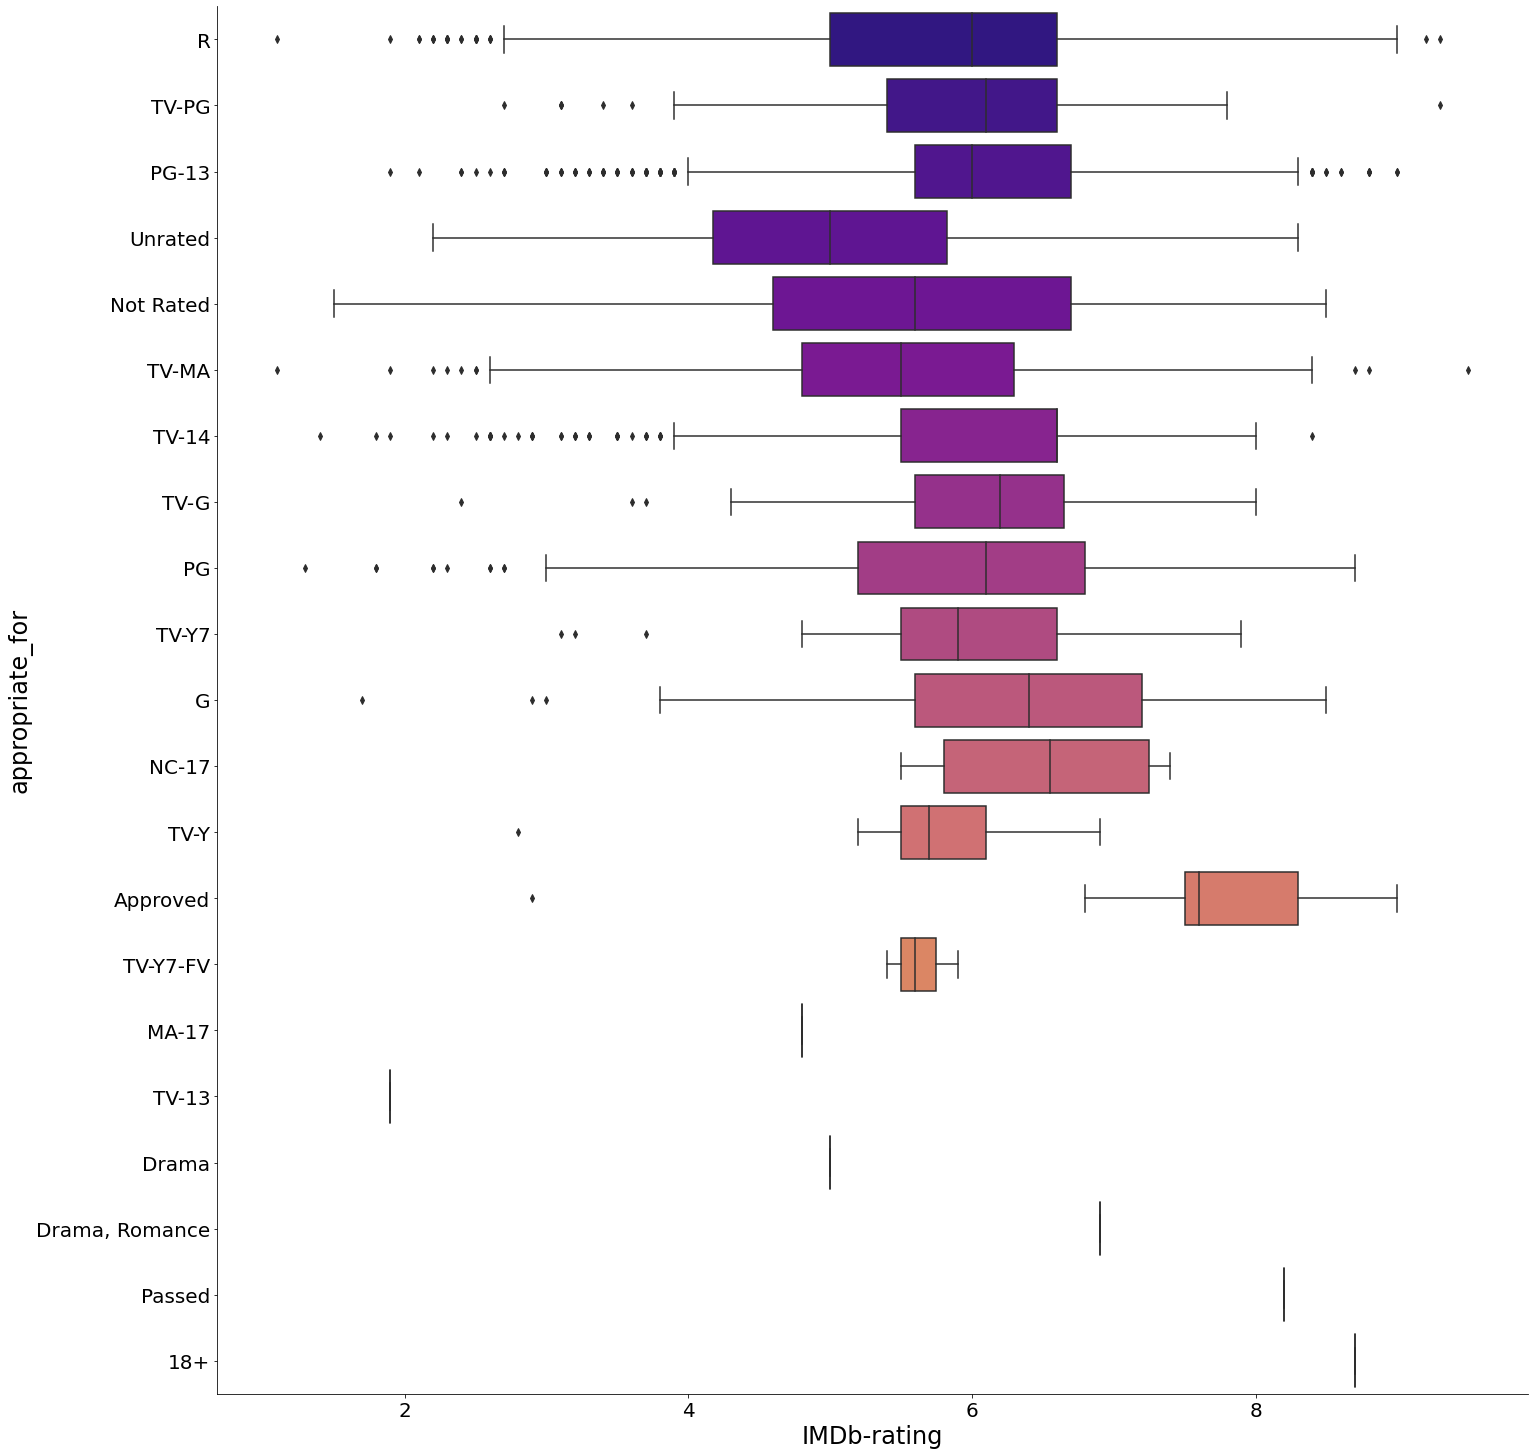

In [111]:
stars_count_box = sns.catplot(data=movies_data, kind='box', y='appropriate_for', x='IMDb-rating', height=20, palette='plasma', sym='*')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('appropriate_for', fontsize=24, )
plt.xlabel('IMDb-rating', fontsize=24)
plt.show()  #输出每一个appropriate_for对应的所有电影的IMDb-rating盒图并显示离群值

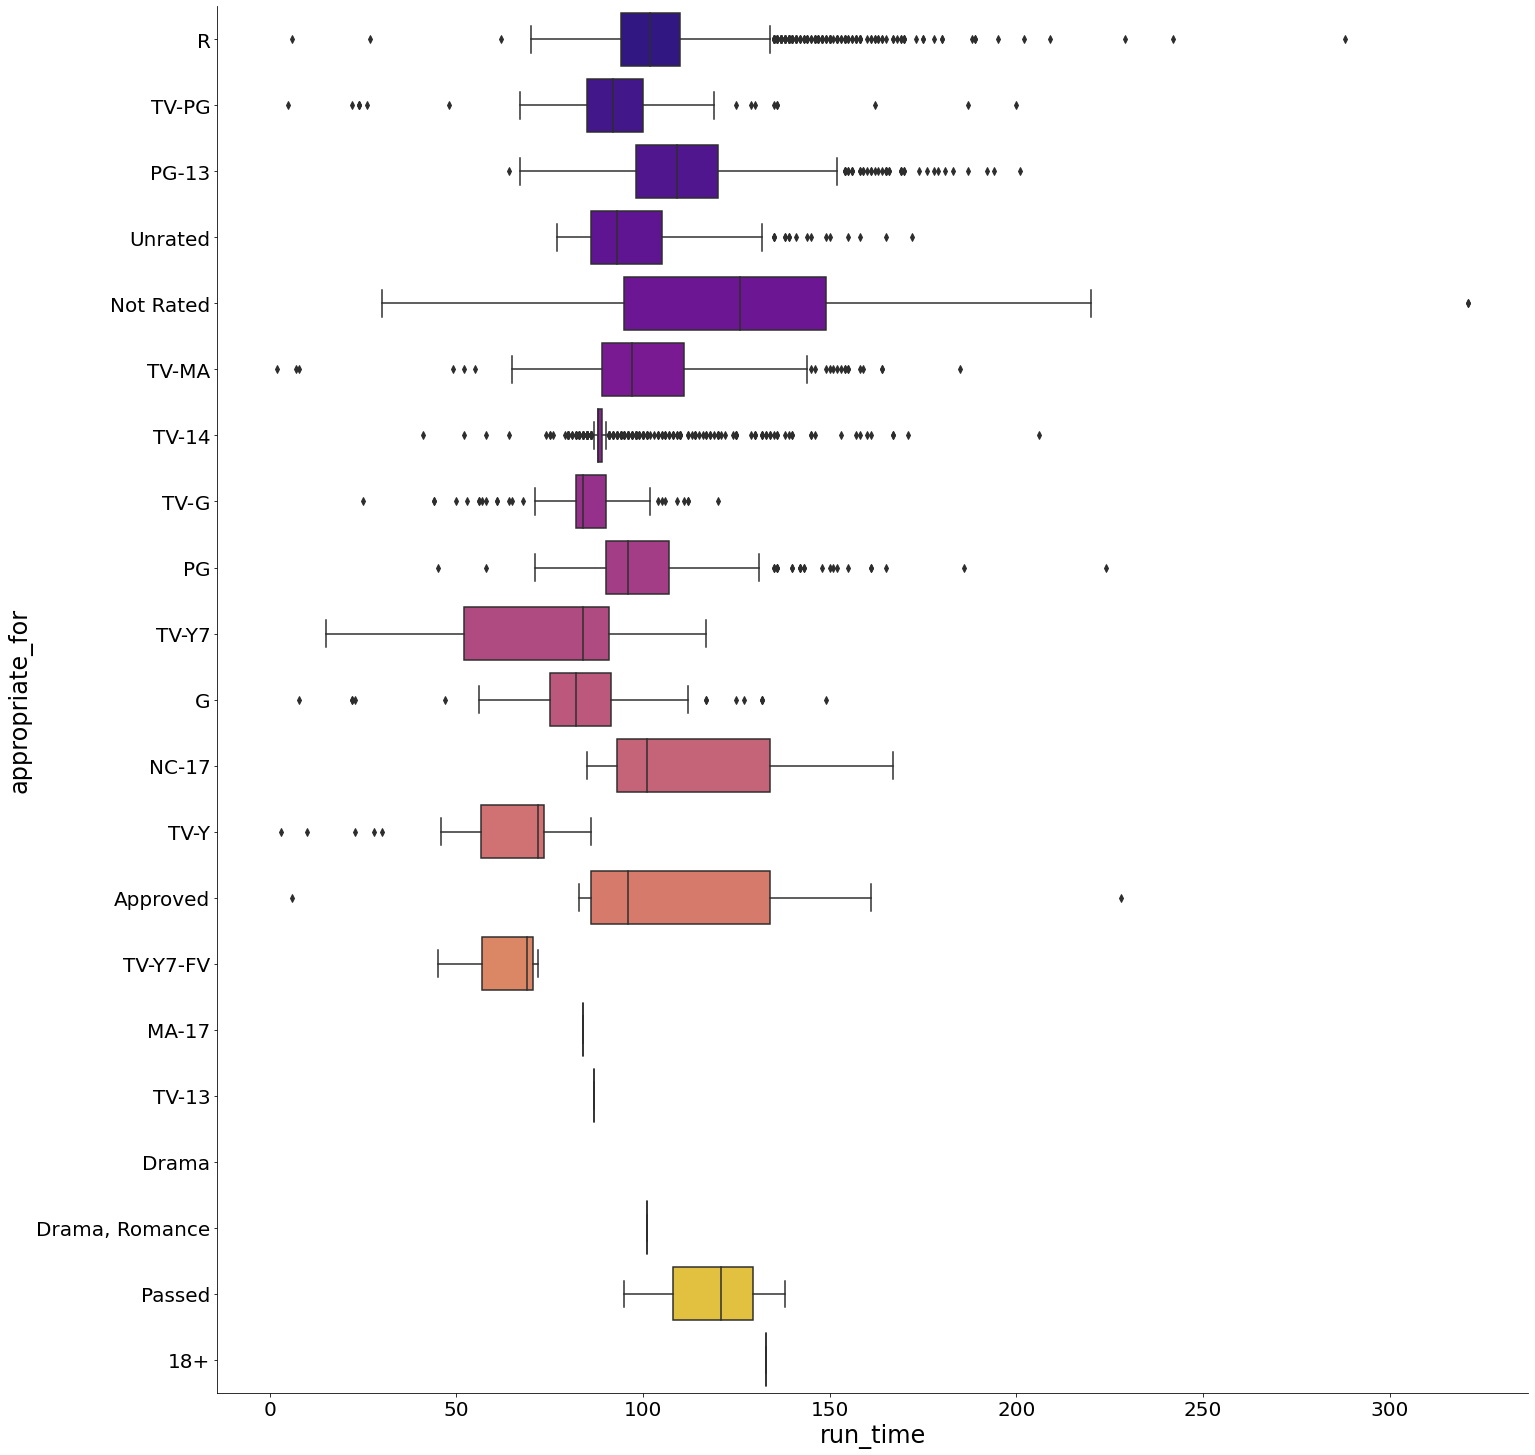

In [112]:
stars_count_box = sns.catplot(data=movies_data, kind='box', y='appropriate_for', x='run_time', height=20, palette='plasma', sym='*')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('appropriate_for', fontsize=24, )
plt.xlabel('run_time', fontsize=24)
plt.show()  #输出每一个appropriate_for对应的所有电影的run_time盒图并显示离群值

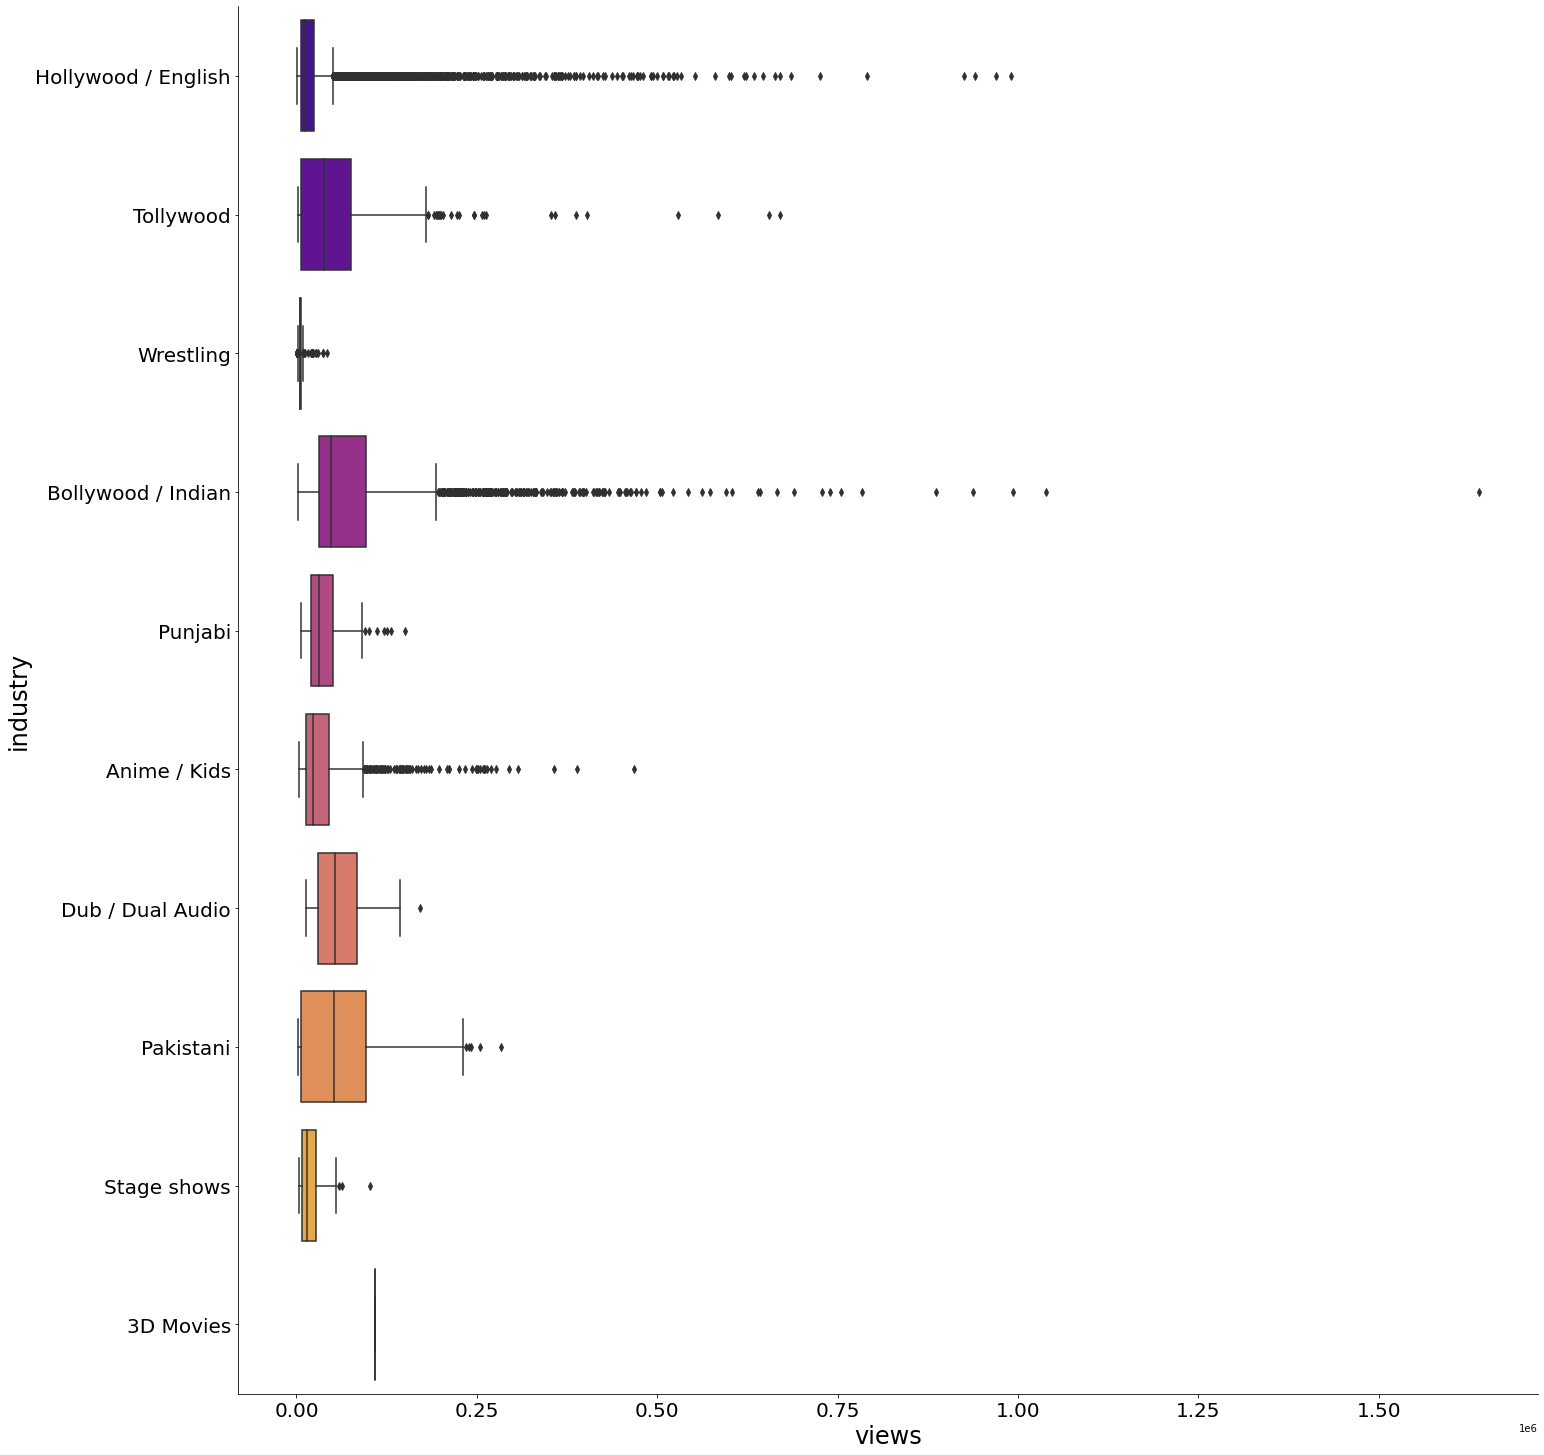

In [113]:
forks_count_box = sns.catplot(data=movies_data, kind='box', y='industry', x='views', height=20, palette='plasma', sym='*')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('industry', fontsize=24, )
plt.xlabel('views', fontsize=24)
plt.show()  #输出每一个industry对应的所有电影views盒图并显示离群值

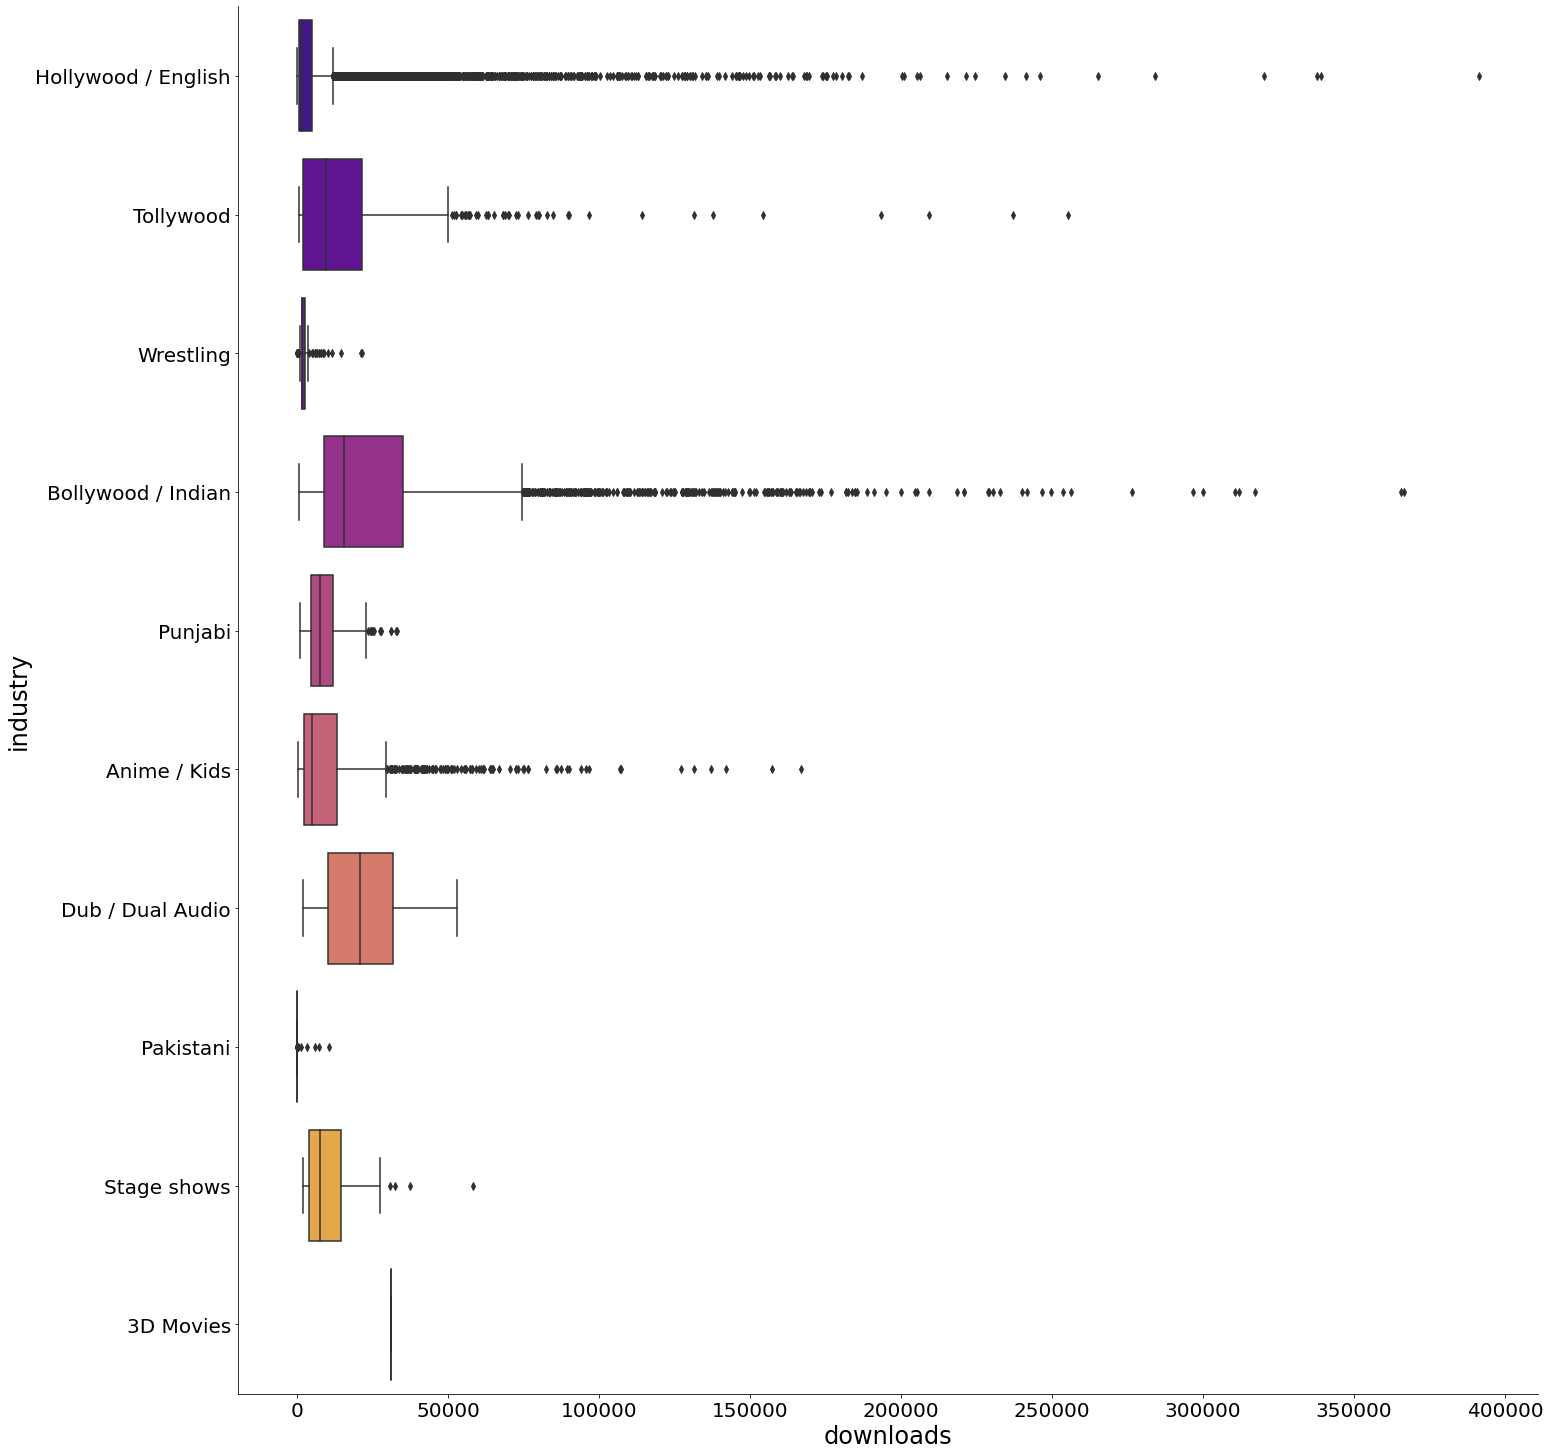

In [114]:
forks_count_box = sns.catplot(data=movies_data, kind='box', y='industry', x='downloads', height=20, palette='plasma', sym='*')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('industry', fontsize=24, )
plt.xlabel('downloads', fontsize=24)
plt.show()  #输出每一个industry对应的所有电影downloads盒图并显示离群值

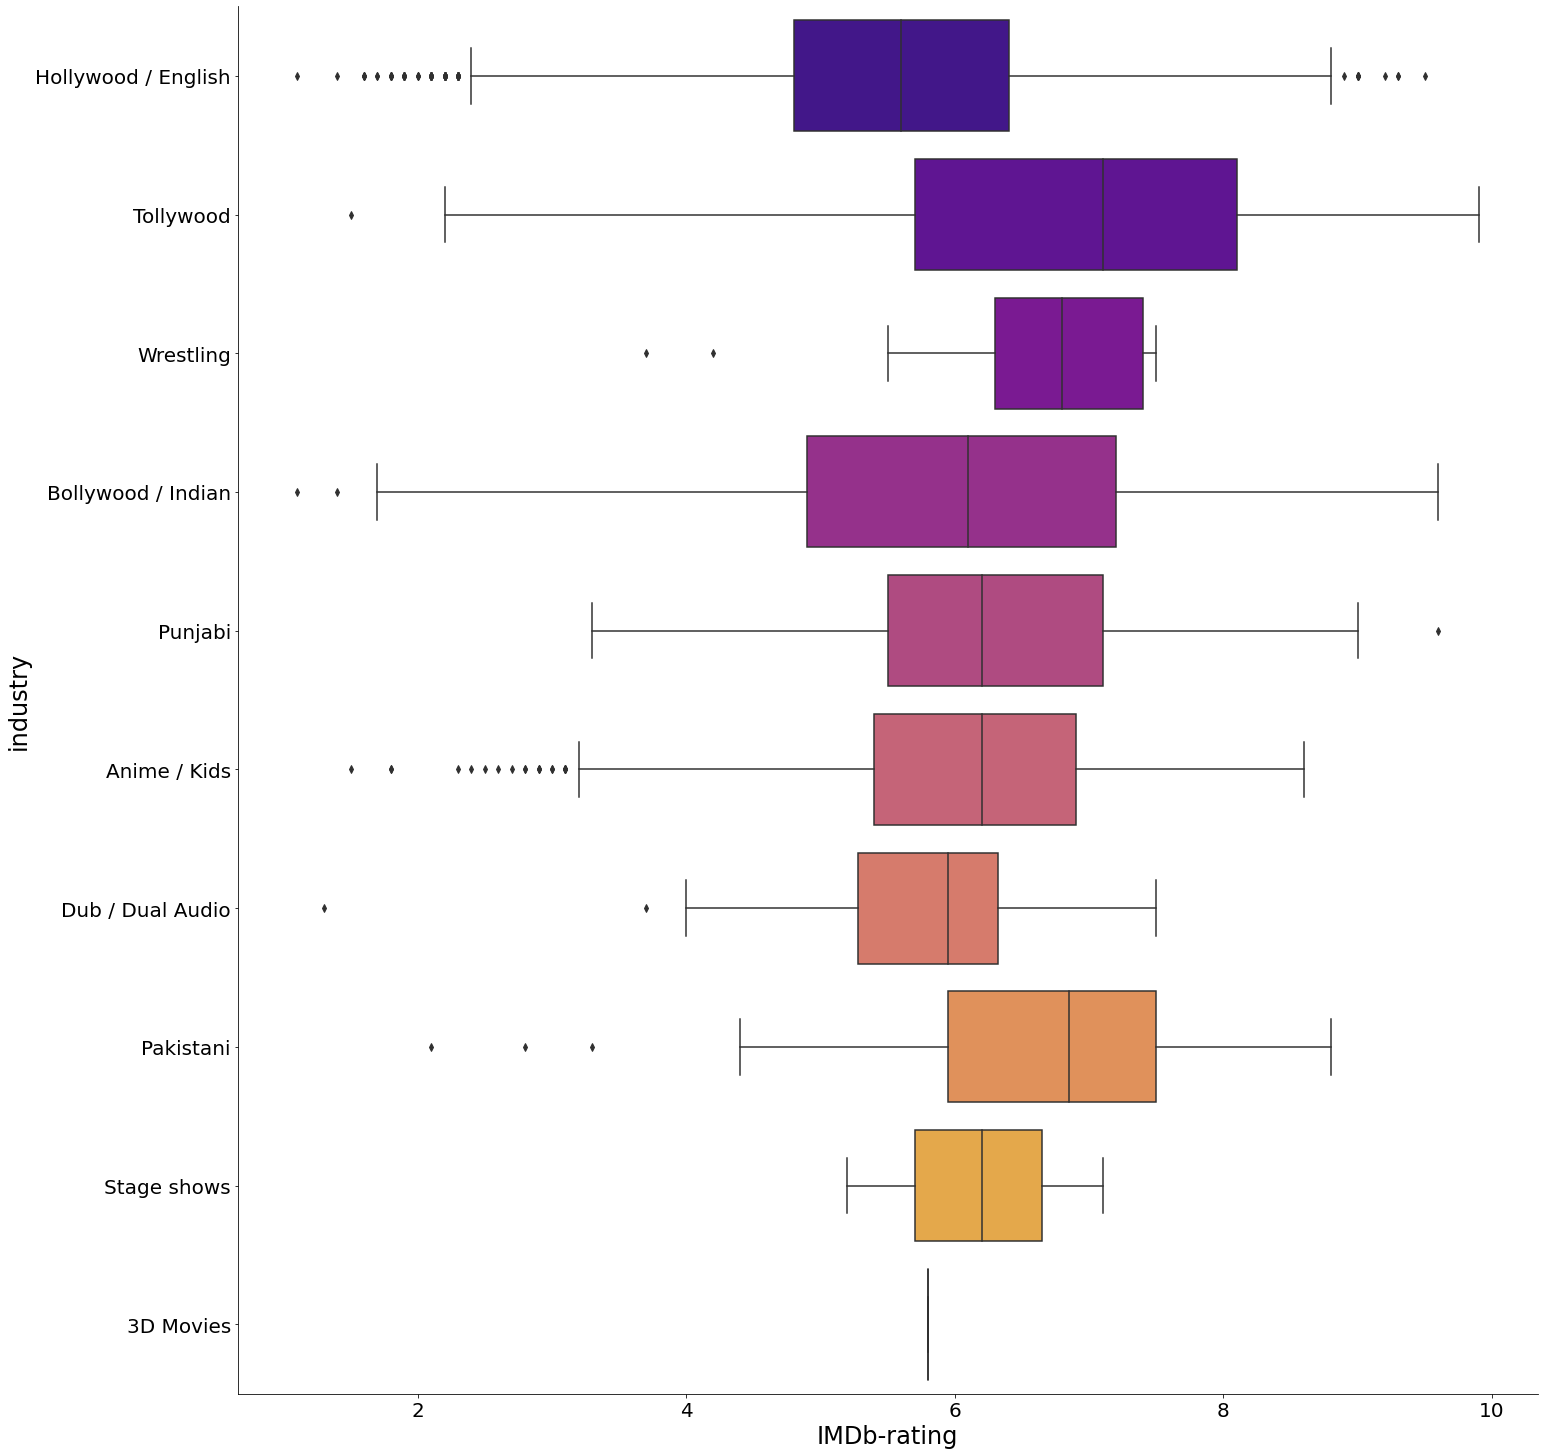

In [115]:
forks_count_box = sns.catplot(data=movies_data, kind='box', y='industry', x='IMDb-rating', height=20, palette='plasma', sym='*')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('industry', fontsize=24, )
plt.xlabel('IMDb-rating', fontsize=24)
plt.show()  #输出每一个industry对应的所有电影IMDb-rating盒图并显示离群值

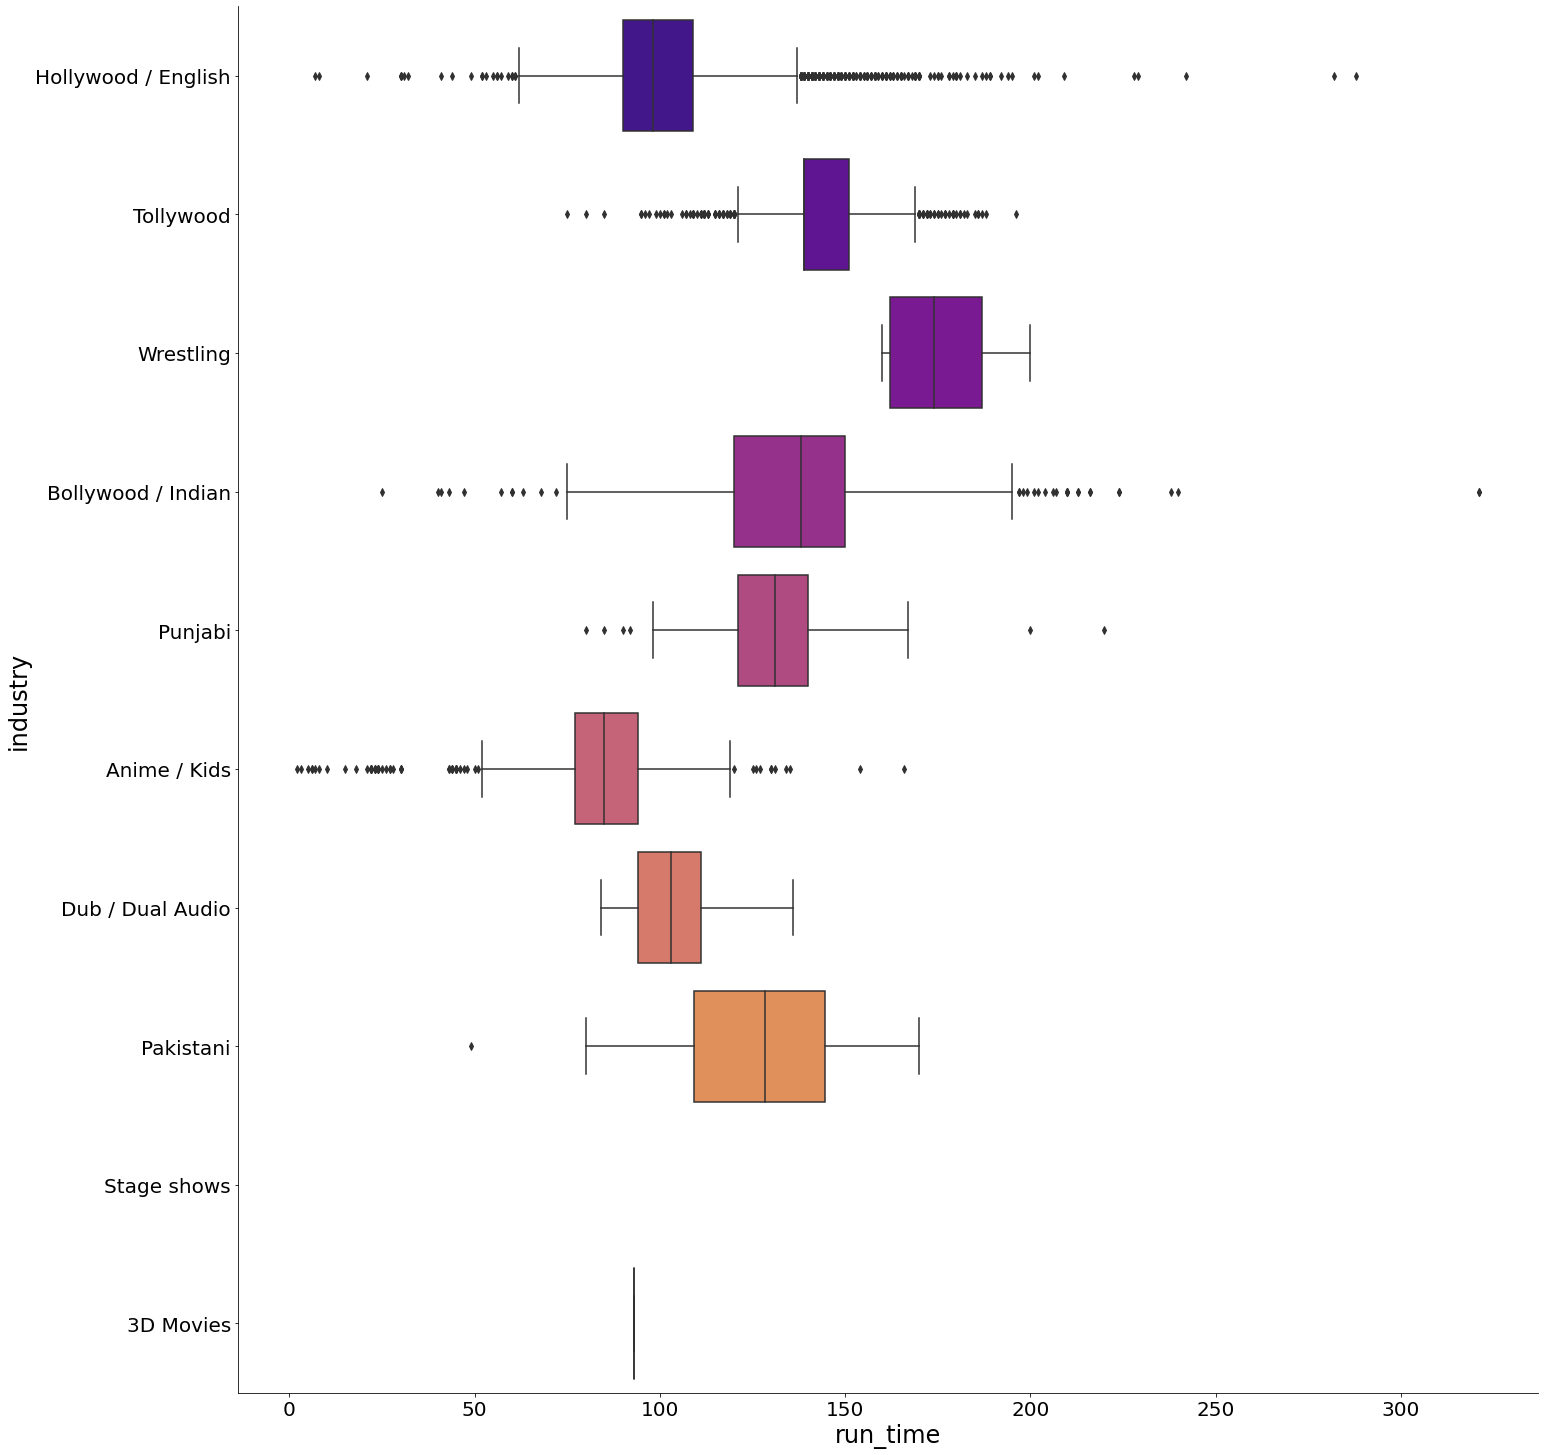

In [116]:
forks_count_box = sns.catplot(data=movies_data, kind='box', y='industry', x='run_time', height=20, palette='plasma', sym='*')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('industry', fontsize=24, )
plt.xlabel('run_time', fontsize=24)
plt.show()  #输出每一个industry对应的所有电影runtime盒图并显示离群值

In [117]:
numeric_counts = pd.DataFrame(list(movies_data['views']), columns=['counts'])
numeric_counts = pd.DataFrame(numeric_counts, columns=['numeric_attribution', 'counts'])
numeric_counts['numeric_attribution'] = 'views'
numeric_counts = numeric_counts.append(pd.DataFrame([['downloads', c] for c in list(movies_data['downloads'])], columns=['numeric_attribution', 'counts']), ignore_index=True)
numeric_counts = numeric_counts.append(pd.DataFrame([['IMDb-rating', c] for c in list(movies_data['IMDb-rating'])], columns=['numeric_attribution', 'counts']), ignore_index=True)
numeric_counts = numeric_counts.append(pd.DataFrame([['run_time', c] for c in list(movies_data['run_time'])], columns=['numeric_attribution', 'counts']), ignore_index=True)
numeric_counts

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7644\936577340.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  numeric_counts = numeric_counts.append(pd.DataFrame([['downloads', c] for c in list(movies_data['downloads'])], columns=['numeric_attribution', 'counts']), ignore_index=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7644\936577340.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  numeric_counts = numeric_counts.append(pd.DataFrame([['IMDb-rating', c] for c in list(movies_data['IMDb-rating'])], columns=['numeric_attribution', 'counts']), ignore_index=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7644\936577340.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  numeric_counts = numeric_counts.append(pd.D

,numeric_attribution,counts
0,views,2794.0
1,views,1002.0
2,views,14419.0
3,views,4878.0
4,views,2438.0
...,...,...
82187,run_time,NaN
82188,run_time,159.0
82189,run_time,NaN
82190,run_time,NaN


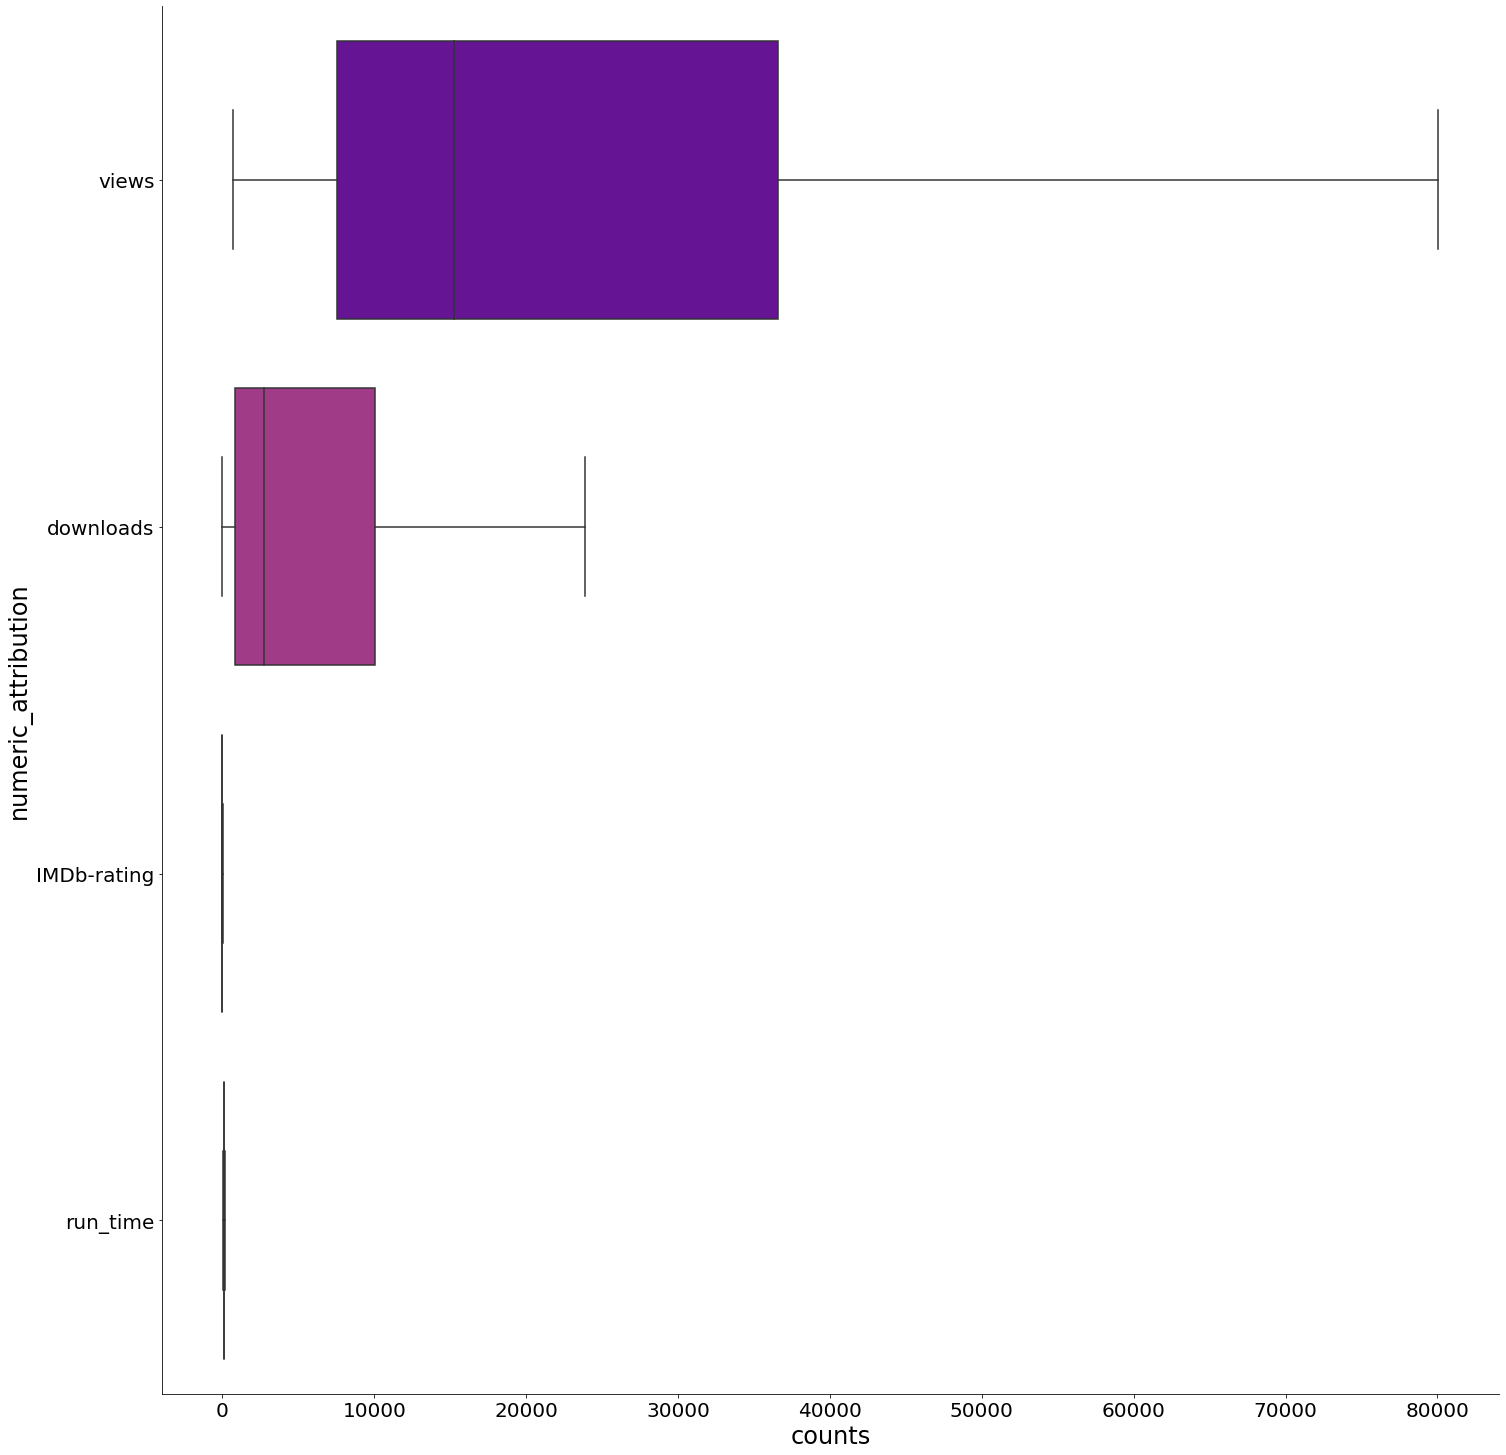

In [118]:
numeric_attribution_box = sns.catplot(data=numeric_counts, kind='box', y='numeric_attribution', x='counts', height=20, palette='plasma', sym='')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('numeric_attribution', fontsize=24, )
plt.xlabel('counts', fontsize=24)
plt.show()  #输出四个数值属性的盒图

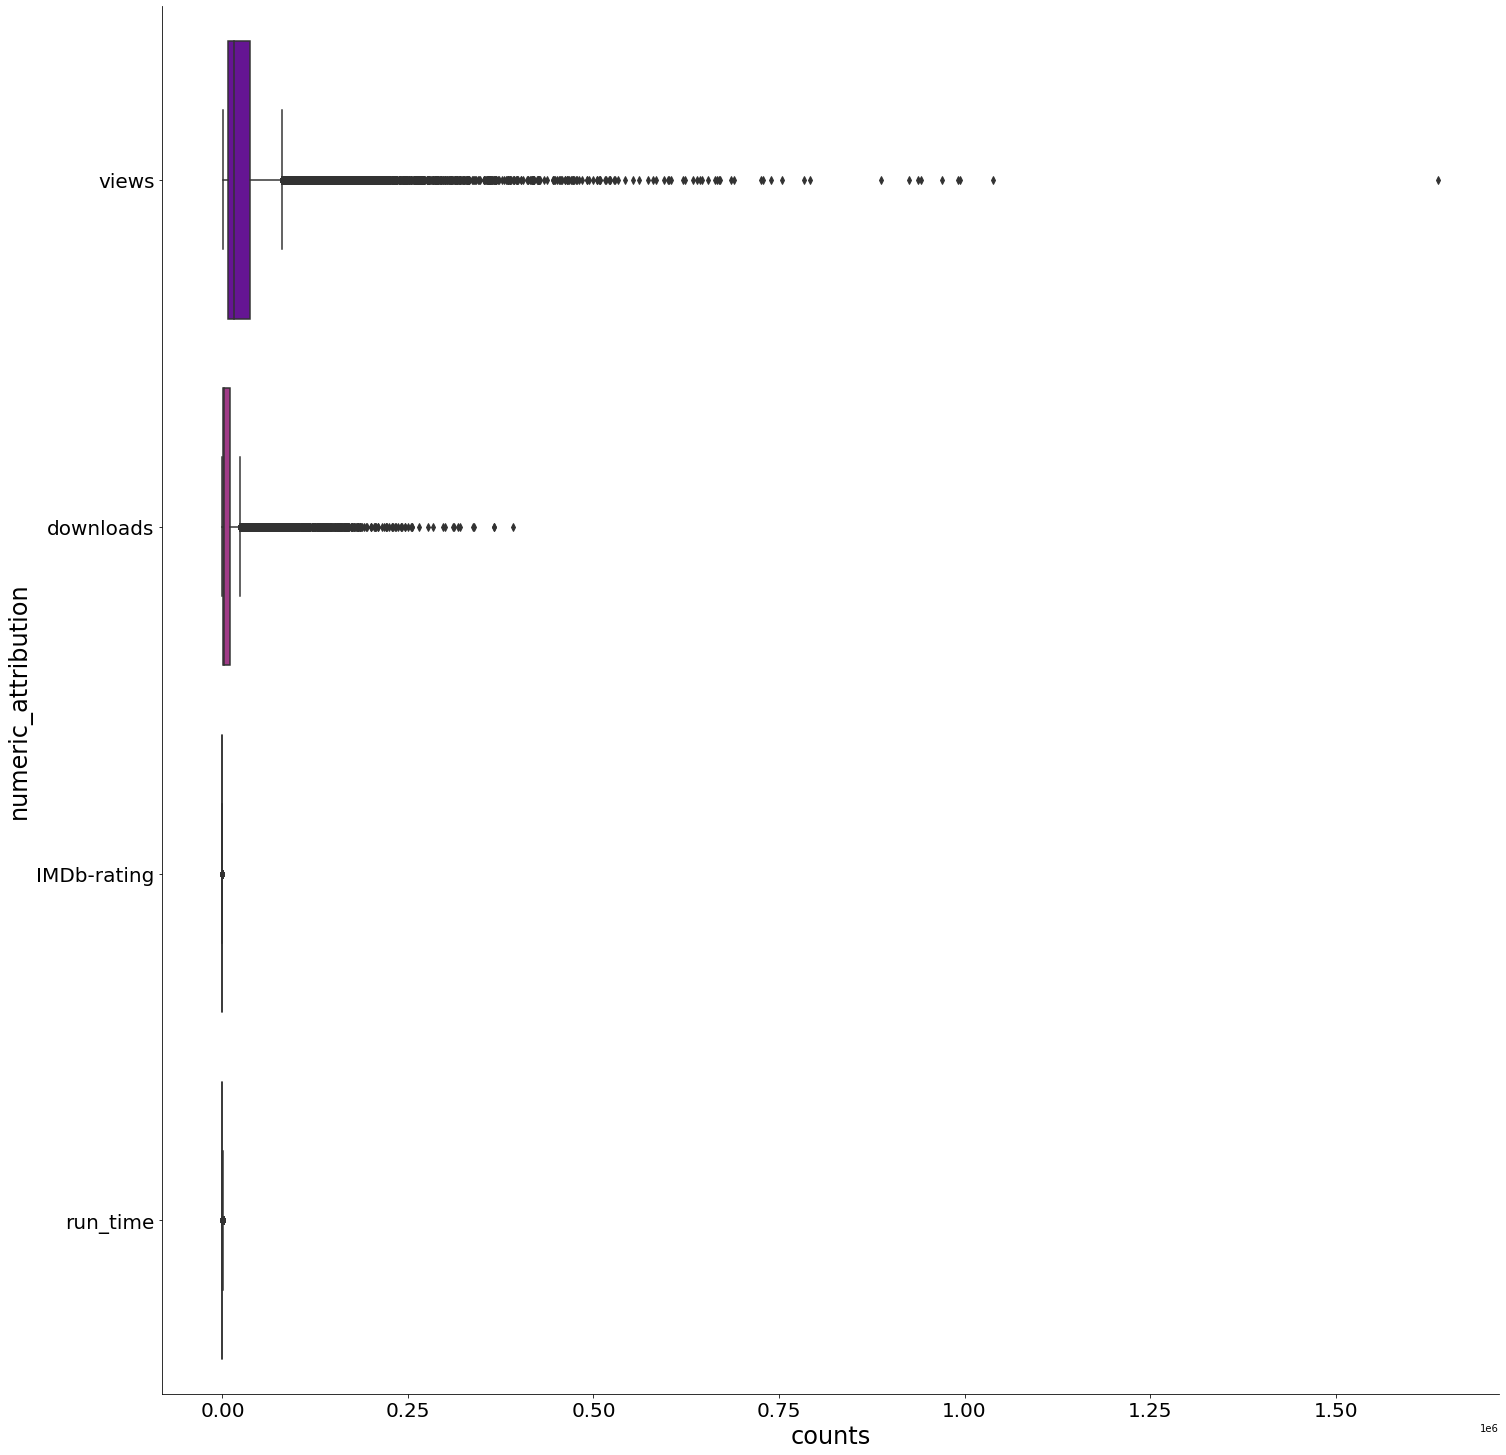

In [119]:
numeric_attribution_box = sns.catplot(data=numeric_counts, kind='box', y='numeric_attribution', x='counts', height=20, palette='plasma', sym='*')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('numeric_attribution', fontsize=24, )
plt.xlabel('counts', fontsize=24)
plt.show()  #输出四个数值属性的盒图及离群值

### 数据缺失的处理

观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:

**将缺失部分剔除**

**用最高频率值来填补缺失值**

**通过属性的相关关系来填补缺失值**

**通过数据对象之间的相似性来填补缺失值**

注意：在处理后完成，要对比新旧数据集的差异。

**观察得到，仅id属性不存在数据缺失情况，其余属性均存在数据缺失情况。** 考虑到实际情况，title、storyline、views、downloads、IMDb-rating、appropriate_for、language、industry、posted_date、release_date、runtime、director、writer中对appropriate_for进行填补具有较高的现实意义，后面重点针对appropriate_for缺失值进行填补。

#### 将缺失部分剔除

删除含有缺失值的行

In [120]:
movies_data_cleaned = movies_data.dropna()
movies_data_cleaned

,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,0,4.8,R,John Swab,304.0,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105.0,Doc\r\n facilitates a fragile truce between th...,Little Dixie,2794.0,John Swab
1,1,6.4,TV-PG,Paul Ziller,73.0,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84.0,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,1002.0,John Christian Plummer
7,7,6.5,R,Benjamin Caron,1781.0,371751,Hollywood / English,English,"13 Feb, 2023",Feb 17 2023,116.0,"Motivations are suspect, and expectations are ...",Sharper,18225.0,"Brian Gatewood, Alessandro Tanaka"
8,8,6.9,PG-13,Ravi Kapoor,458.0,372042,Hollywood / English,English,"18 Feb, 2023",Dec 02 2022,80.0,An\r\n unmotivated South Asian American rapper...,Four Samosas,6912.0,Ravi Kapoor
13,13,6.6,PG-13,Peyton Reed,14867.0,371992,Hollywood / English,"English,Hindi","17 Feb, 2023",Feb 17 2023,125.0,"Scott\r\n Lang and Hope Van Dyne, along with H...",Ant-Man and the Wasp: Quantumania,39399.0,"Jack Kirby, Jeff Loveness"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20522,20522,7.1,Not Rated,Biren Nag,1932.0,23825,Bollywood / Indian,Hindi,"01 Jan, 1970",May 11 1962,158.0,"After a lusty Thakur rapes a young girl, she k...",Bees Saal Baad,6076.0,"Dhruva Chatterjee, Dev Kishan"
20525,20525,7.0,G,Guy Hamilton,2544.0,25548,Hollywood / English,"English,German,Polish,French","01 Jan, 1970",Sep 17 1969,132.0,Historical reenactment of the air war in the e...,Battle of Britain,9319.0,"James Kennaway, Wilfred Greatorex, Derek Dempster"
20533,20533,5.6,R,Barbara Topsøe-Rothenborg,12284.0,1173,Hollywood / English,"Spanish,German,English","26 May, 2016",Jan 01 1970,90.0,"LOVE AT FIRST HICCUP is a charming, innocent, ...",Love at First Hiccup,36022.0,"Barbara Topsøe-Rothenborg, Søren Frellesen, De..."
20537,20537,7.1,Not Rated,Biren Nag,1932.0,23825,Bollywood / Indian,Hindi,"01 Jan, 1970",May 11 1962,158.0,"After a lusty Thakur rapes a young girl, she k...",Bees Saal Baad,6077.0,"Dhruva Chatterjee, Dev Kishan"


#### 用最高频率值来填补缺失值

将缺失值填补为出现频率最高的数据

In [121]:
movies_data_highfrequency = movies_data.copy()

for column in movies_data_highfrequency.columns:  
    most_frequent_value = movies_data_highfrequency[column].mode()[0]   # 找到该列频率最高的值
    movies_data_highfrequency[column].fillna(most_frequent_value, inplace=True)    # 用频率最高的值填补缺失值

movies_data_highfrequency['appropriate_for'].value_counts()   

R                 13860
Not Rated          2142
PG-13              1968
PG                  886
TV-14               694
TV-MA               406
G                   152
Unrated             132
TV-PG               115
TV-G                 99
TV-Y7                45
TV-Y                 25
Approved              9
NC-17                 4
TV-Y7-FV              3
Passed                3
MA-17                 1
TV-13                 1
Drama                 1
Drama, Romance        1
18+                   1
Name: appropriate_for, dtype: int64

In [122]:
movies_data['appropriate_for'].value_counts()   

R                 4384
Not Rated         2142
PG-13             1968
PG                 886
TV-14              694
TV-MA              406
G                  152
Unrated            132
TV-PG              115
TV-G                99
TV-Y7               45
TV-Y                25
Approved             9
NC-17                4
TV-Y7-FV             3
Passed               3
MA-17                1
TV-13                1
Drama                1
Drama, Romance       1
18+                  1
Name: appropriate_for, dtype: int64

#### 通过属性的相关关系来填补缺失值

属性相关关系填补缺失值

In [123]:
movies_onehot = pd.get_dummies(movies_data, columns=['appropriate_for'], dummy_na=True, drop_first=True) #为appropriate_for创建独热编码，缺失1不缺失0
movies_onehot

,Unnamed: 0,IMDb-rating,director,downloads,id,industry,language,posted_date,release_date,run_time,...,appropriate_for_TV-13,appropriate_for_TV-14,appropriate_for_TV-G,appropriate_for_TV-MA,appropriate_for_TV-PG,appropriate_for_TV-Y,appropriate_for_TV-Y7,appropriate_for_TV-Y7-FV,appropriate_for_Unrated,appropriate_for_nan
0,0,4.8,John Swab,304.0,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105.0,...,0,0,0,0,0,0,0,0,0,0
1,1,6.4,Paul Ziller,73.0,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84.0,...,0,0,0,0,1,0,0,0,0,0
2,2,5.2,Ben Wheatley,1427.0,343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,NaN,...,0,0,0,0,0,0,0,0,0,0
3,3,8.1,Venky Atluri,1549.0,372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139.0,...,0,0,0,0,0,0,0,0,0,1
4,4,4.6,Shaji Kailas,657.0,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20543,20543,NaN,NaN,1998.0,28957,Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 13 1959,NaN,...,0,0,0,0,0,0,0,0,0,1
20544,20544,7.7,Bimal Roy,6080.0,28958,Bollywood / Indian,Hindi,"01 Jan, 1970",May 13 1955,159.0,...,0,0,0,0,0,0,0,0,0,1
20545,20545,8.0,NaN,3276.0,30459,Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 28 1958,NaN,...,0,0,0,0,0,0,0,0,0,1
20546,20546,NaN,NaN,309.0,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,NaN,...,0,0,0,0,0,0,0,0,0,1


Text(0.5, 1.0, 'Correlation Analysis')

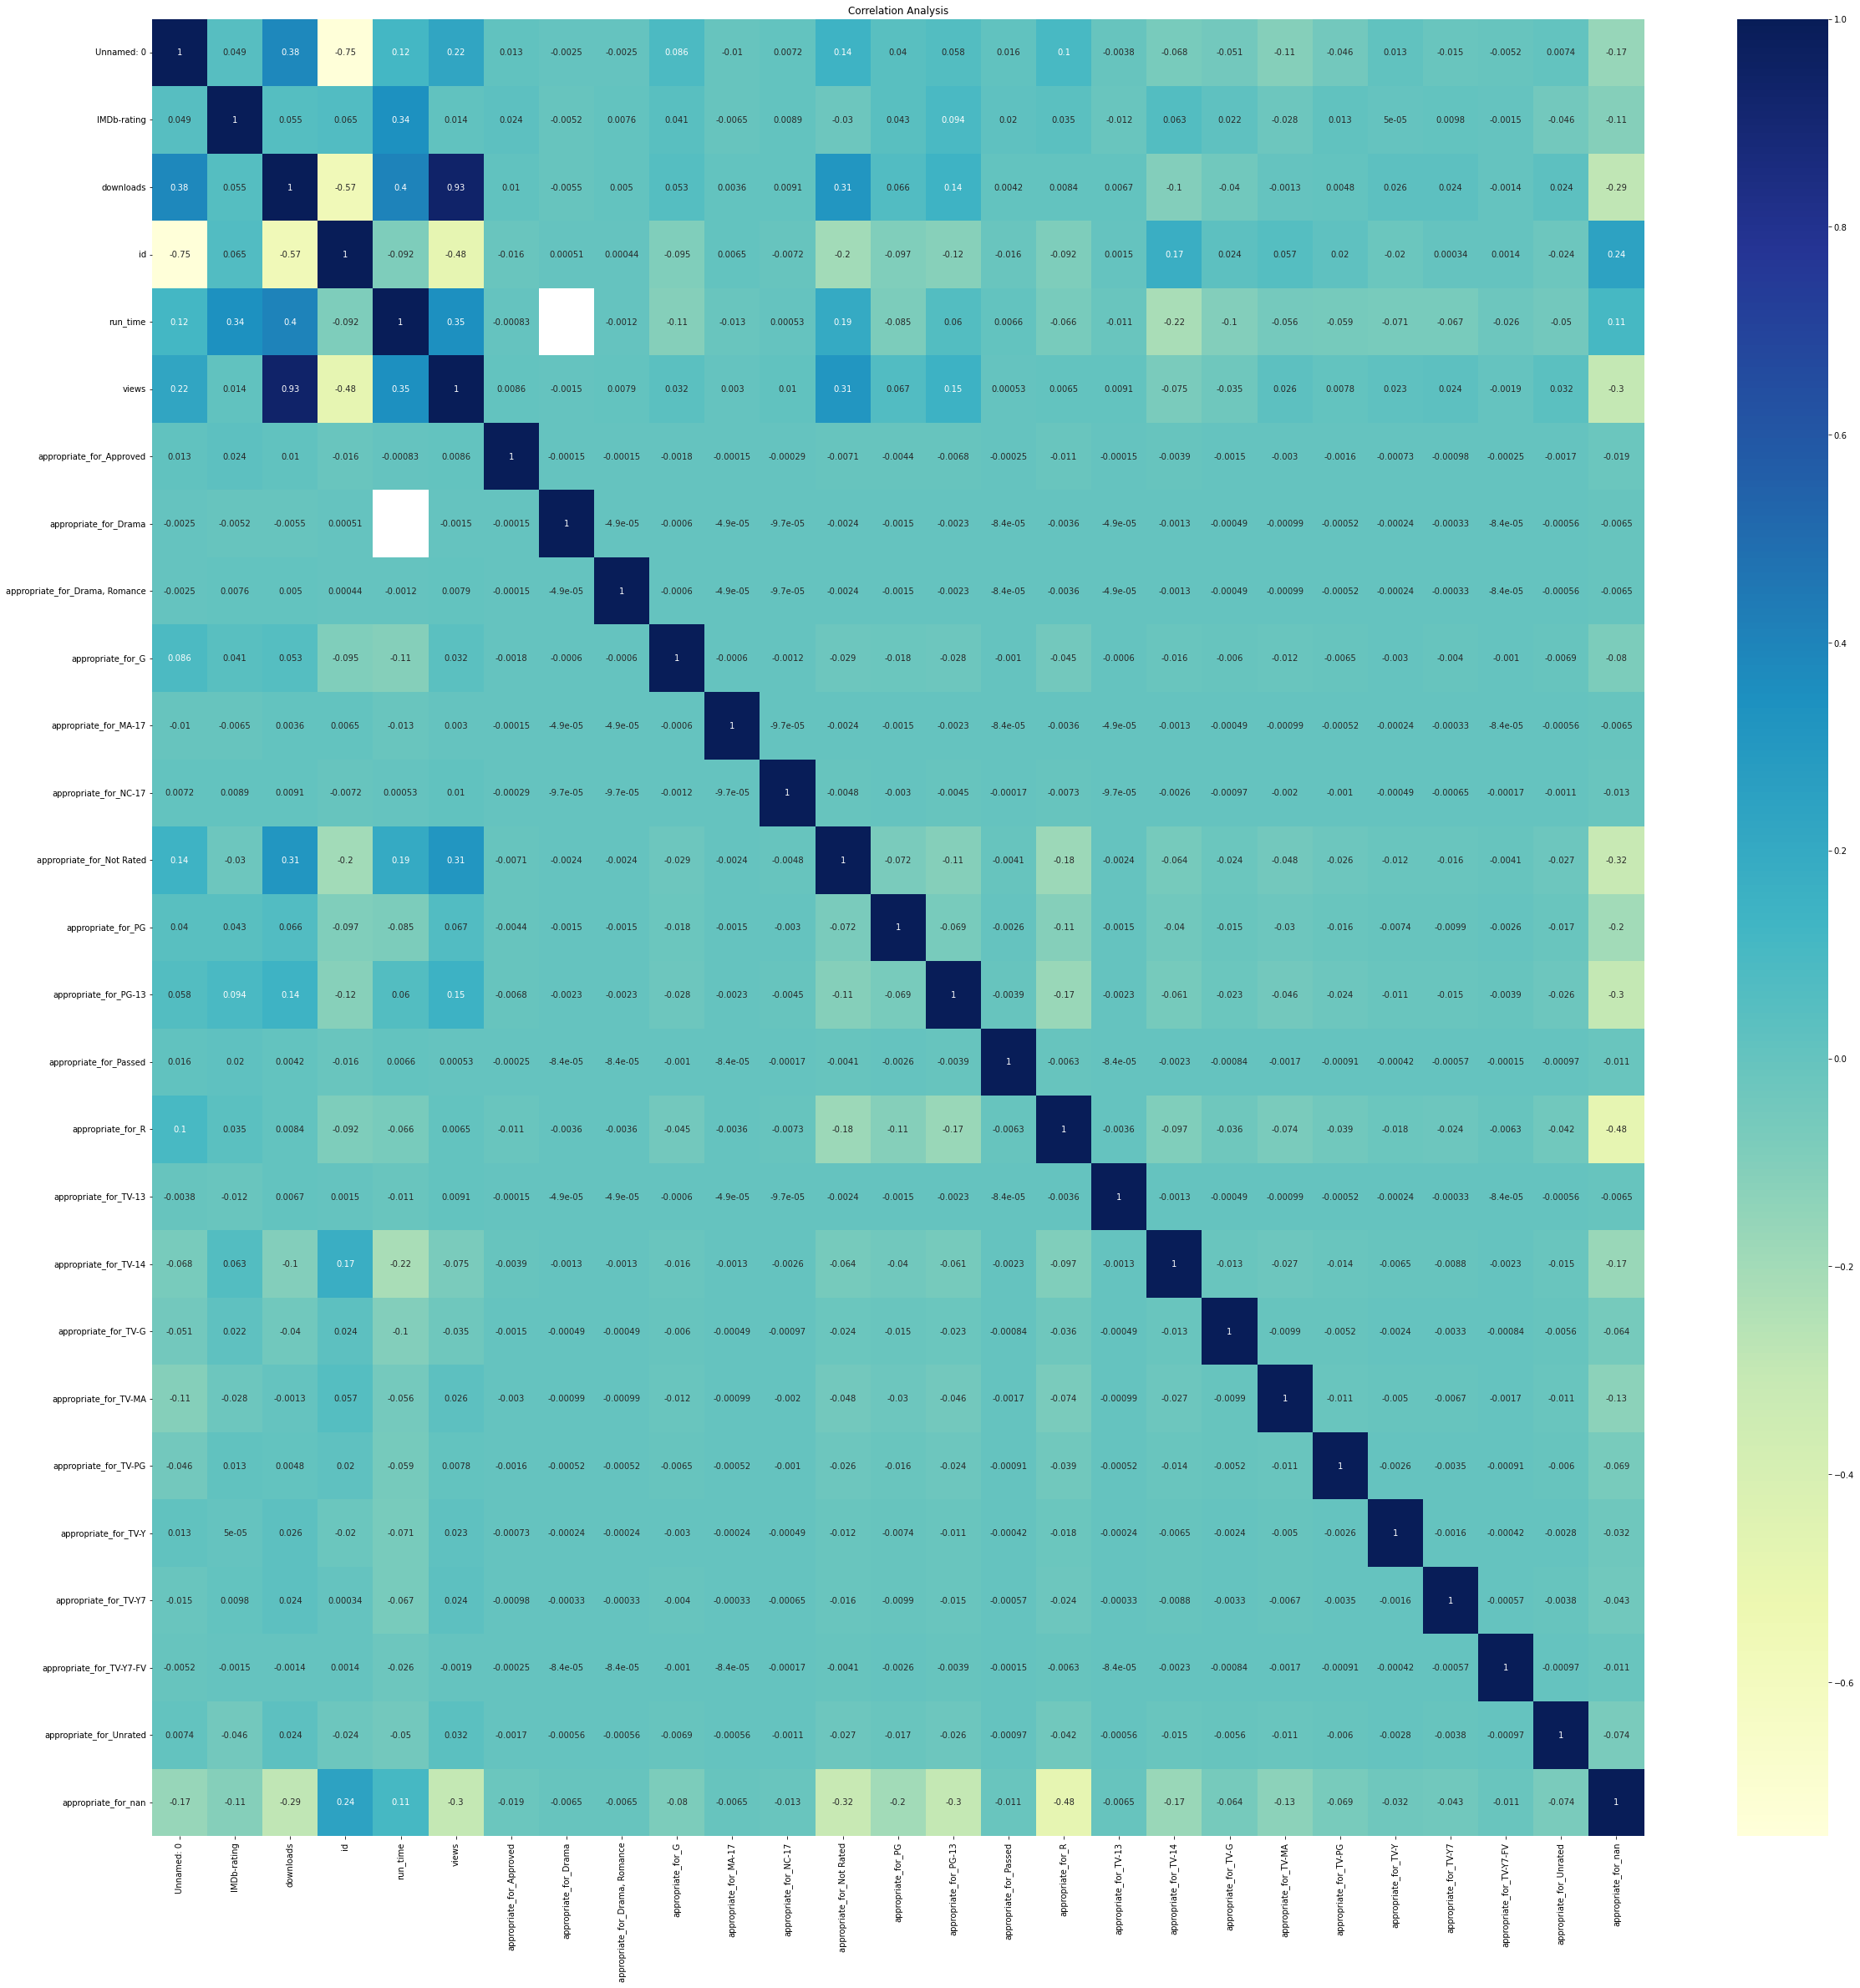

In [124]:
plt.figure(figsize=(40, 40))
sns.heatmap(movies_onehot.corr(method='spearman'), cmap='YlGnBu', annot=True)
plt.title('Correlation Analysis')  #绘制热图展示appropriate_for和数值属性之间的相关性，斯皮尔曼相关系数衡量

可以观察到appropriate_for和数值属性之间的相关性较差。

In [125]:
from numpy import nan
movies_data_copy = movies_data.copy()
appropriate_for_views = movies_data_copy.groupby('appropriate_for').agg(views_average=('views', 'mean')) #按appropriate_for进行分组并聚合views均值
for i in range(len(movies_data_copy)):
    if movies_data_copy['appropriate_for'].iloc[i] is nan:
        rate = movies_data_copy['views'].iloc[i]
        dist = []
        for j in range(len(appropriate_for_views)):
            dist.append(abs(appropriate_for_views.iloc[j]['views_average']-rate))
        idx = dist.index(min(dist))
        movies_data_copy['appropriate_for'].iloc[i] = appropriate_for_views.index[idx]   #根据缺失值所在行的views值，找到与之最接近的平均值，并将其对应appropriate_for填充为缺失值
movies_data_copy['appropriate_for'].value_counts()   #展示填充缺失值后每种appropriate_for的数量

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7644\1667150720.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data_copy['appropriate_for'].iloc[i] = appropriate_for_views.index[idx]   #根据缺失值所在行的views值，找到与之最接近的平均值，并将其对应appropriate_for填充为缺失值


R                 4492
18+               4492
Not Rated         2573
PG-13             2135
Drama             1494
TV-14              976
PG                 922
TV-G               562
TV-MA              486
TV-PG              381
TV-Y7              344
G                  287
TV-Y7-FV           263
MA-17              236
Unrated            227
Drama, Romance     170
TV-13              144
Approved           101
Passed              98
NC-17               90
TV-Y                75
Name: appropriate_for, dtype: int64

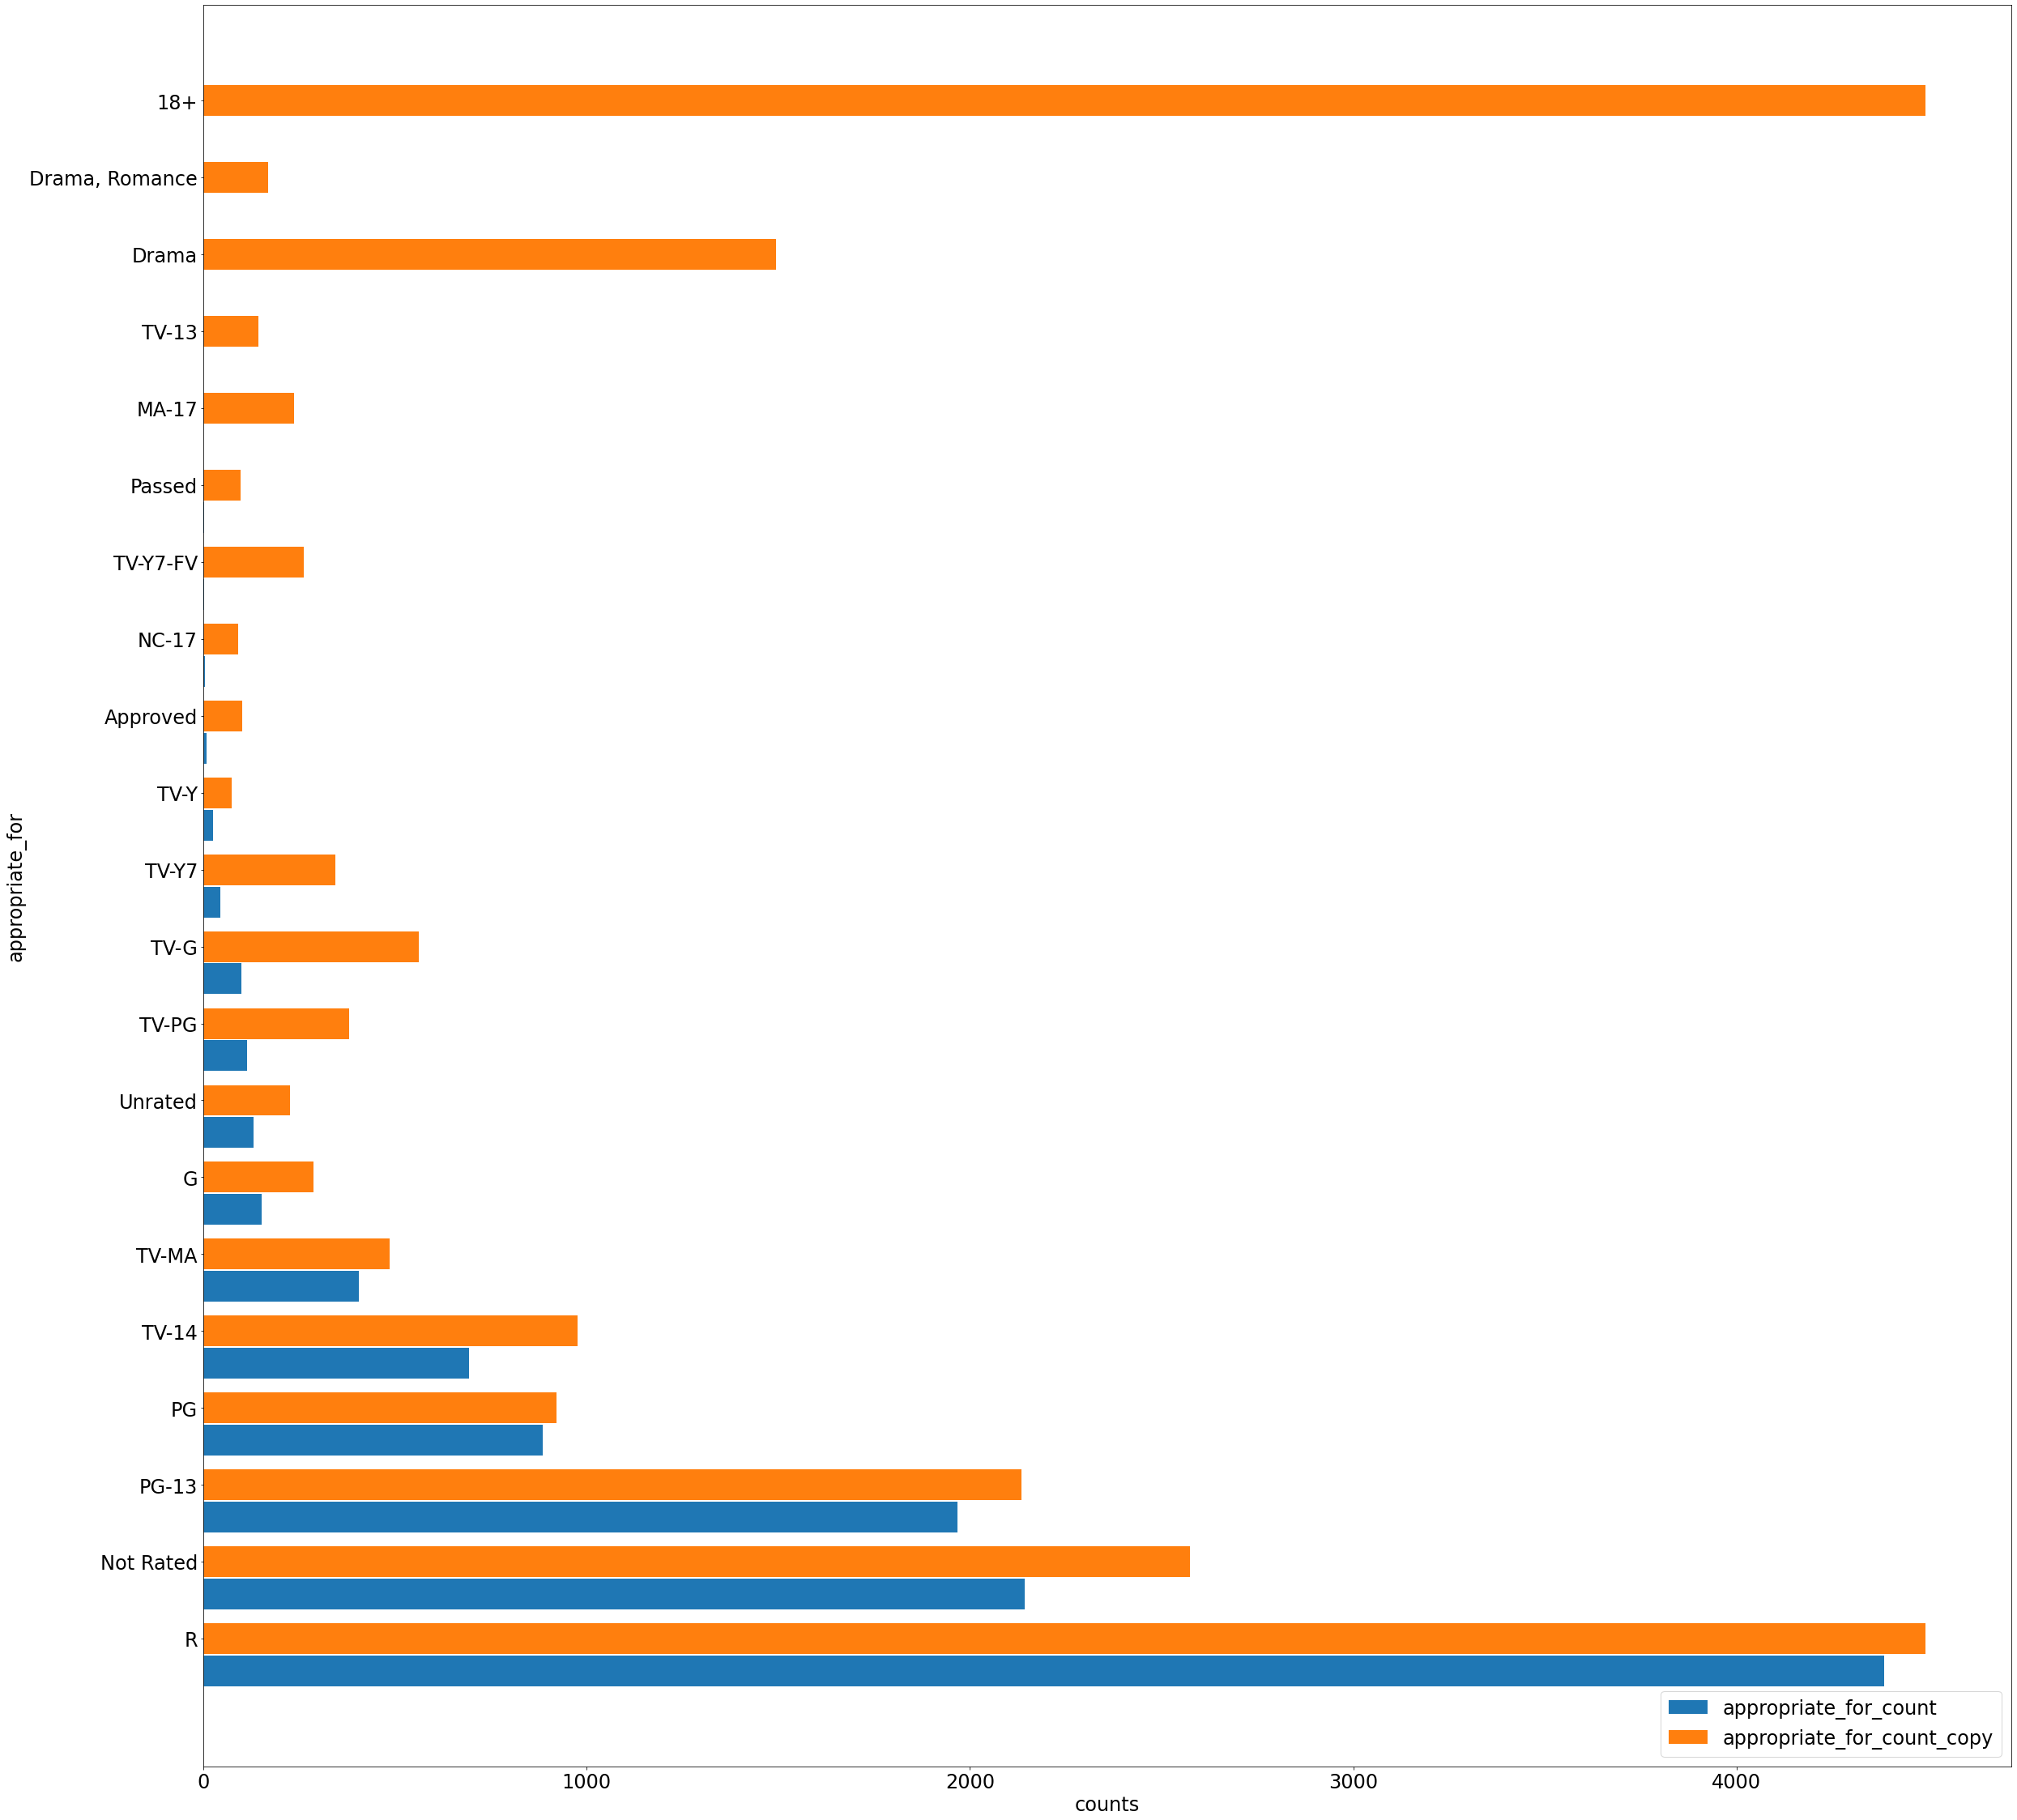

In [126]:
appropriate_for_count_copy = appropriate_for_counts
appropriate_for_count_copy['appropriate_for_count_copy'] = [0] * len(appropriate_for_counts)

for level in list(appropriate_for_counts.index):
    if level in list(movies_data_copy['appropriate_for'].value_counts().index):
        appropriate_for_count_copy.loc[[level], ['appropriate_for_count_copy']] = movies_data_copy['appropriate_for'].value_counts().loc[[level]].values[0]
        
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(list(range(len(appropriate_for_count_copy))), tick_label=appropriate_for_count_copy.index, width=appropriate_for_count_copy['appropriate_for_count'], label='appropriate_for_count', height=0.4)
plt.barh([d+0.42 for d in list(range(len(appropriate_for_count_copy)))], tick_label=appropriate_for_count_copy.index, width=appropriate_for_count_copy['appropriate_for_count_copy'], label='appropriate_for_count_copy', height=0.4)
plt.ylabel('appropriate_for', fontsize=24)
plt.xlabel('counts', fontsize=24)
plt.legend(fontsize=24, loc='lower right')
plt.show()     #显示原始数据中每种appropriate_for的数量和填充缺失值后的每种appropriate_for的数量对比图。

可以观察到填充缺失值后数据和初始数据差距较大，整体走势和峰值都有所变化，这进一步说明了appropriate_for属性和views属性的相关性较弱。

#### 通过数据对象之间的相似性来填补缺失值

通过数据对象之间的相似性来填补缺失值

In [128]:
import numpy as np

def regularit(dataframe):
    new_dataframe = pd.DataFrame(index=dataframe.index)
    columns = ['views', 'downloads', 'IMDb-rating', 'run_time']
    for c in columns:
        d = dataframe[c]
        MAX = d.max()
        MIN = d.min()
        new_dataframe[c] = (d - MIN) / (MAX - MIN)
    return new_dataframe

movies_data_copy1 = movies_data.copy()
normal_movies_data = regularit(movies_data_copy1)  # 归一化数值属性

normal_appropriate_for = pd.concat([normal_movies_data, movies_data_copy1['appropriate_for']], axis=1)  # 归一化后的数值属性与appropriate_for拼接

infos = []
for _, row in normal_appropriate_for.iterrows():
    info = [row['views'], row['downloads'], row['IMDb-rating'], row['run_time']]
    infos.append(info)

for i, row in normal_appropriate_for.iterrows():
    if pd.isnull(row['appropriate_for']):
        dists = []
        for j, rate in enumerate(infos):
            dist = np.sqrt(np.sum(np.square(np.array(infos[i]) - np.array(rate))))
            dists.append(dist)
        idx = dists.index(min(dists))
        movies_data_copy1.at[i, 'appropriate_for'] = movies_data_copy1.at[idx, 'appropriate_for']

print(movies_data_copy1['appropriate_for'].value_counts())


R                 9482
Not Rated         2142
PG-13             1968
PG                 886
TV-14              694
TV-MA              406
G                  152
Unrated            132
TV-PG              115
TV-G                99
TV-Y7               45
TV-Y                25
Approved             9
NC-17                4
TV-Y7-FV             3
Passed               3
MA-17                1
TV-13                1
Drama                1
Drama, Romance       1
18+                  1
Name: appropriate_for, dtype: int64


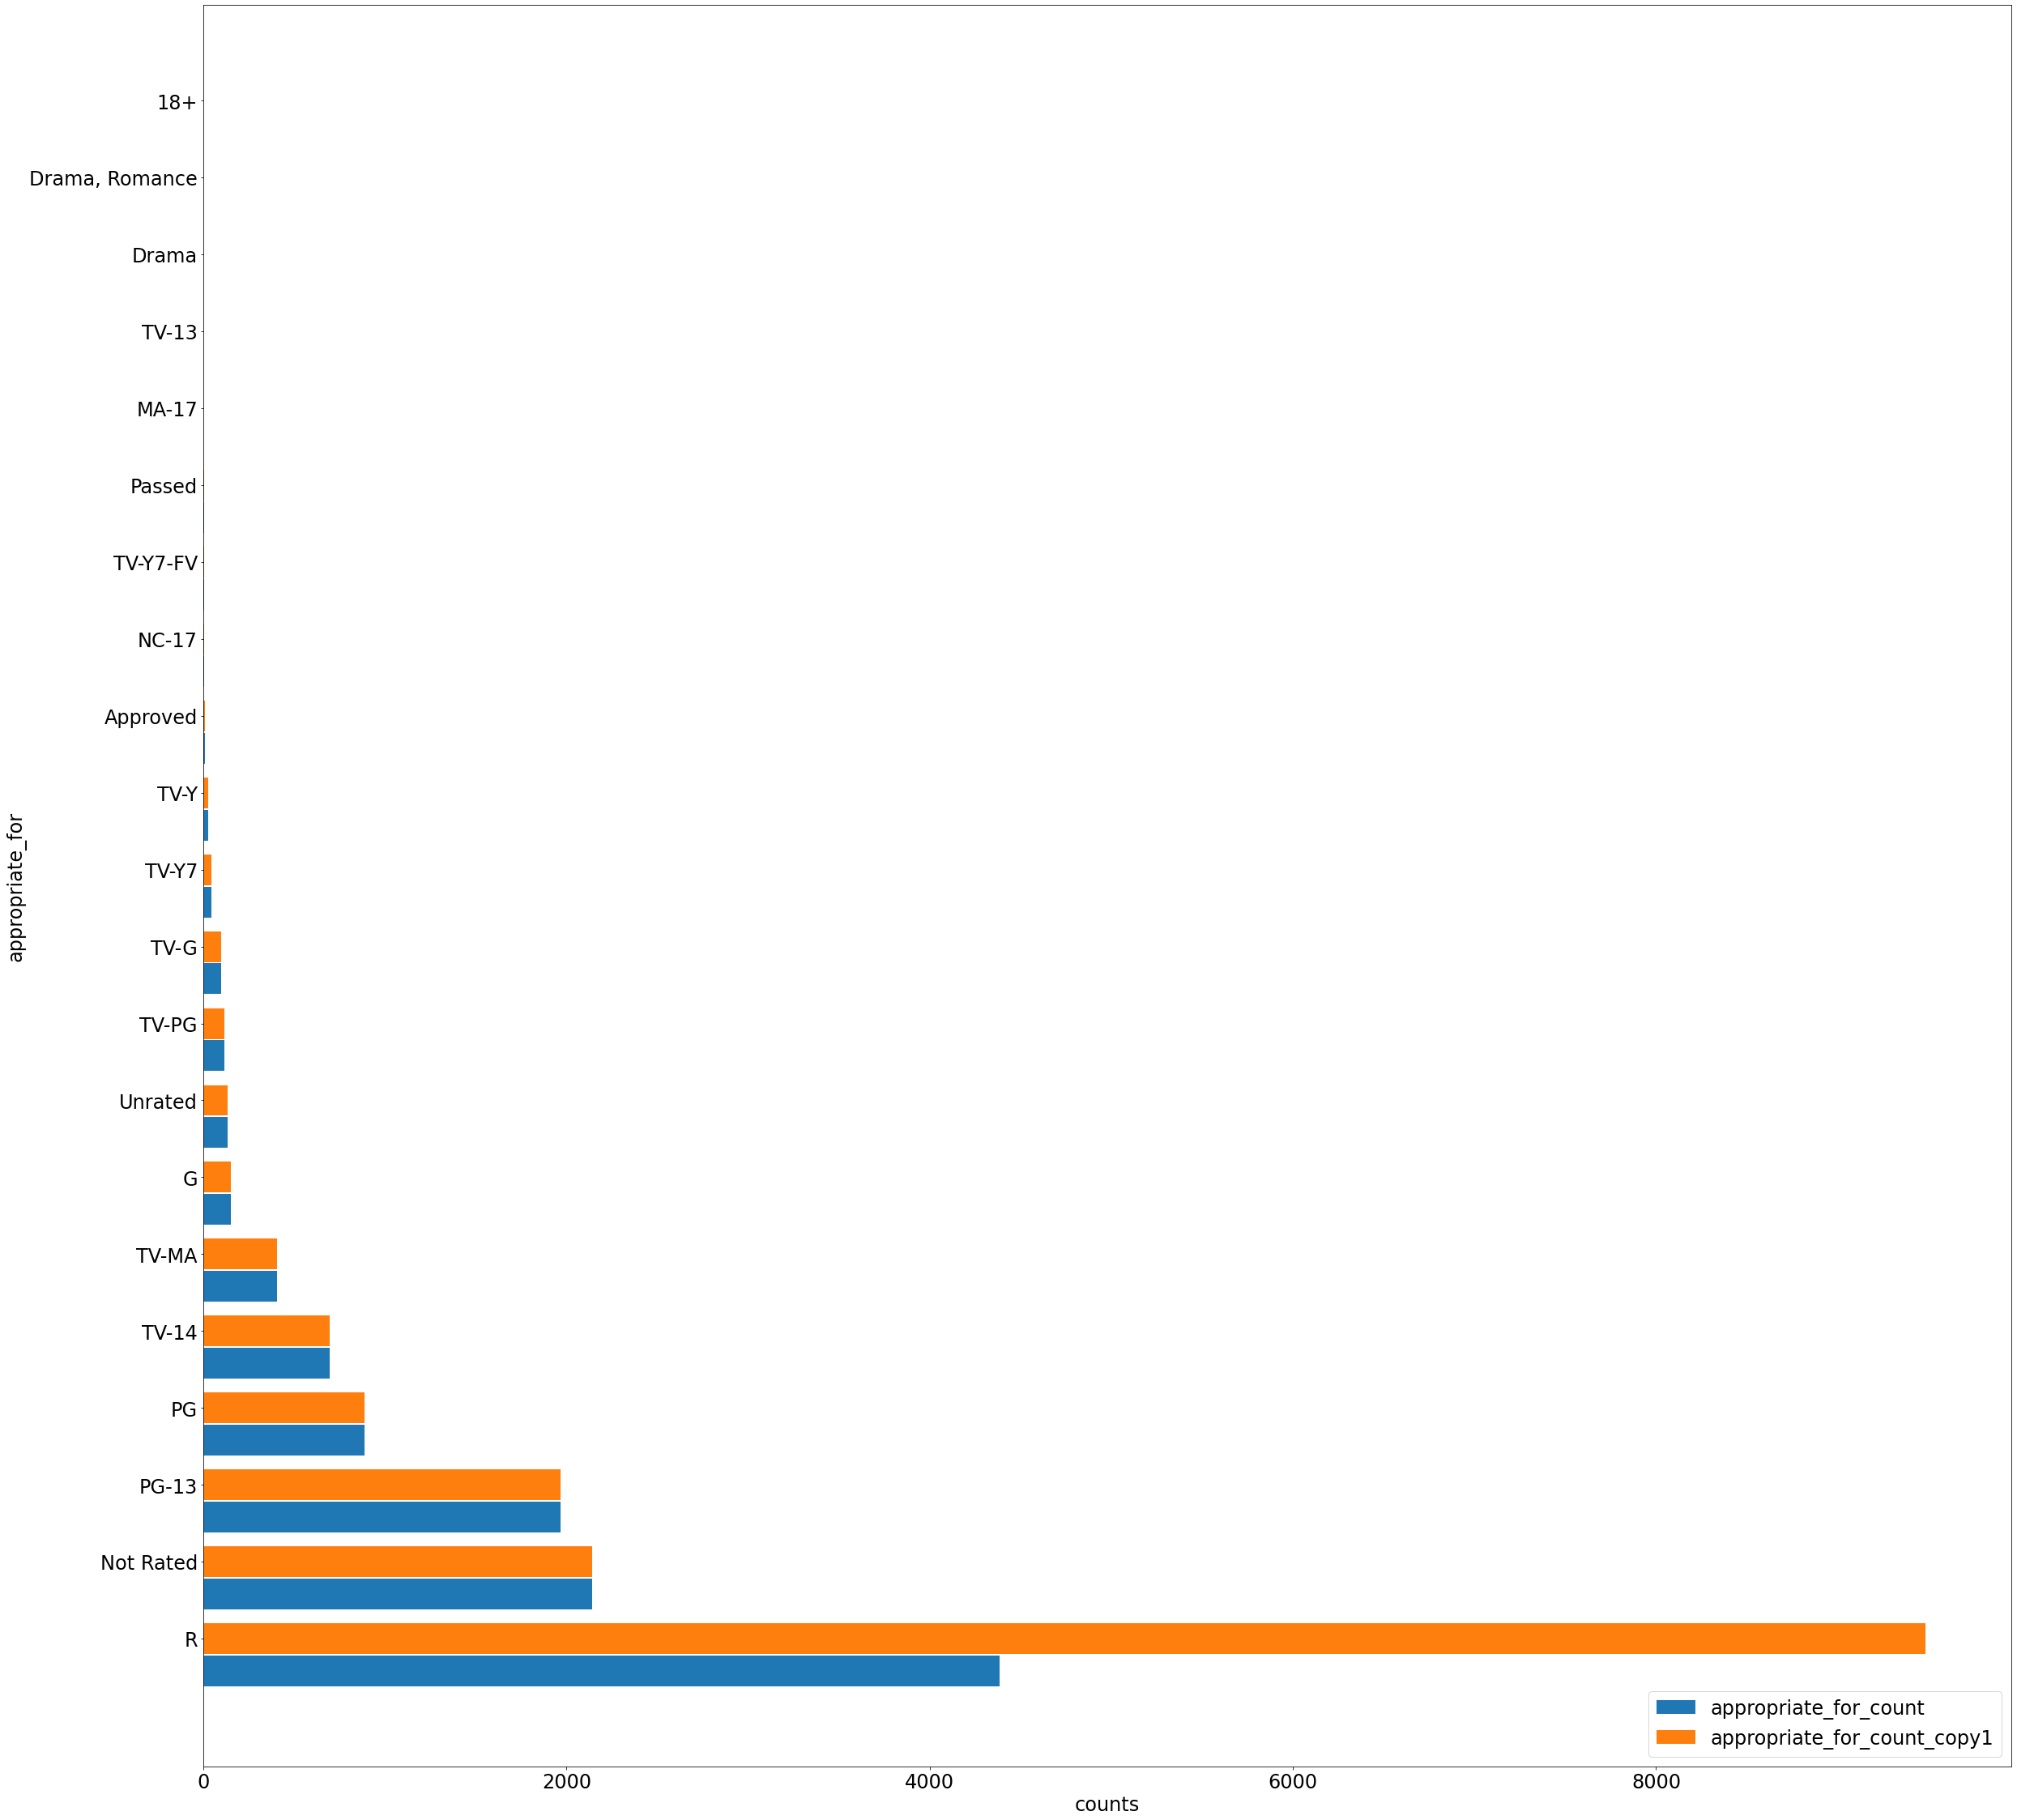

In [133]:
appropriate_for_count_copy1 = appropriate_for_counts
appropriate_for_count_copy1['appropriate_for_count_copy1'] = [0] * len(appropriate_for_counts)

for level in list(appropriate_for_counts.index):
    if level in list(movies_data_copy1['appropriate_for'].value_counts().index):
        appropriate_for_count_copy1.loc[[level], ['appropriate_for_count_copy1']] = movies_data_copy1['appropriate_for'].value_counts().loc[[level]].values[0]
        
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(list(range(len(appropriate_for_count_copy))), tick_label=appropriate_for_count_copy1.index, width=appropriate_for_count_copy1['appropriate_for_count'], label='appropriate_for_count', height=0.4)
plt.barh([d+0.42 for d in list(range(len(appropriate_for_count_copy1)))], tick_label=appropriate_for_count_copy1.index, width=appropriate_for_count_copy['appropriate_for_count_copy1'], label='appropriate_for_count_copy1', height=0.4)
plt.ylabel('appropriate_for', fontsize=24)
plt.xlabel('counts', fontsize=24)
plt.legend(fontsize=24, loc='lower right')
plt.show()   #显示原始数据中每种语言的数量和填充缺失值后的每种语言的数量对比图。

可以观察到填补完缺失值后与初始数据的分布差异较大，这是由于数值属性的欧氏距离与appropriate_for的相关性较差，填充缺失值的效果并不是很好。